# CHICAGO CRASH DATA SET

 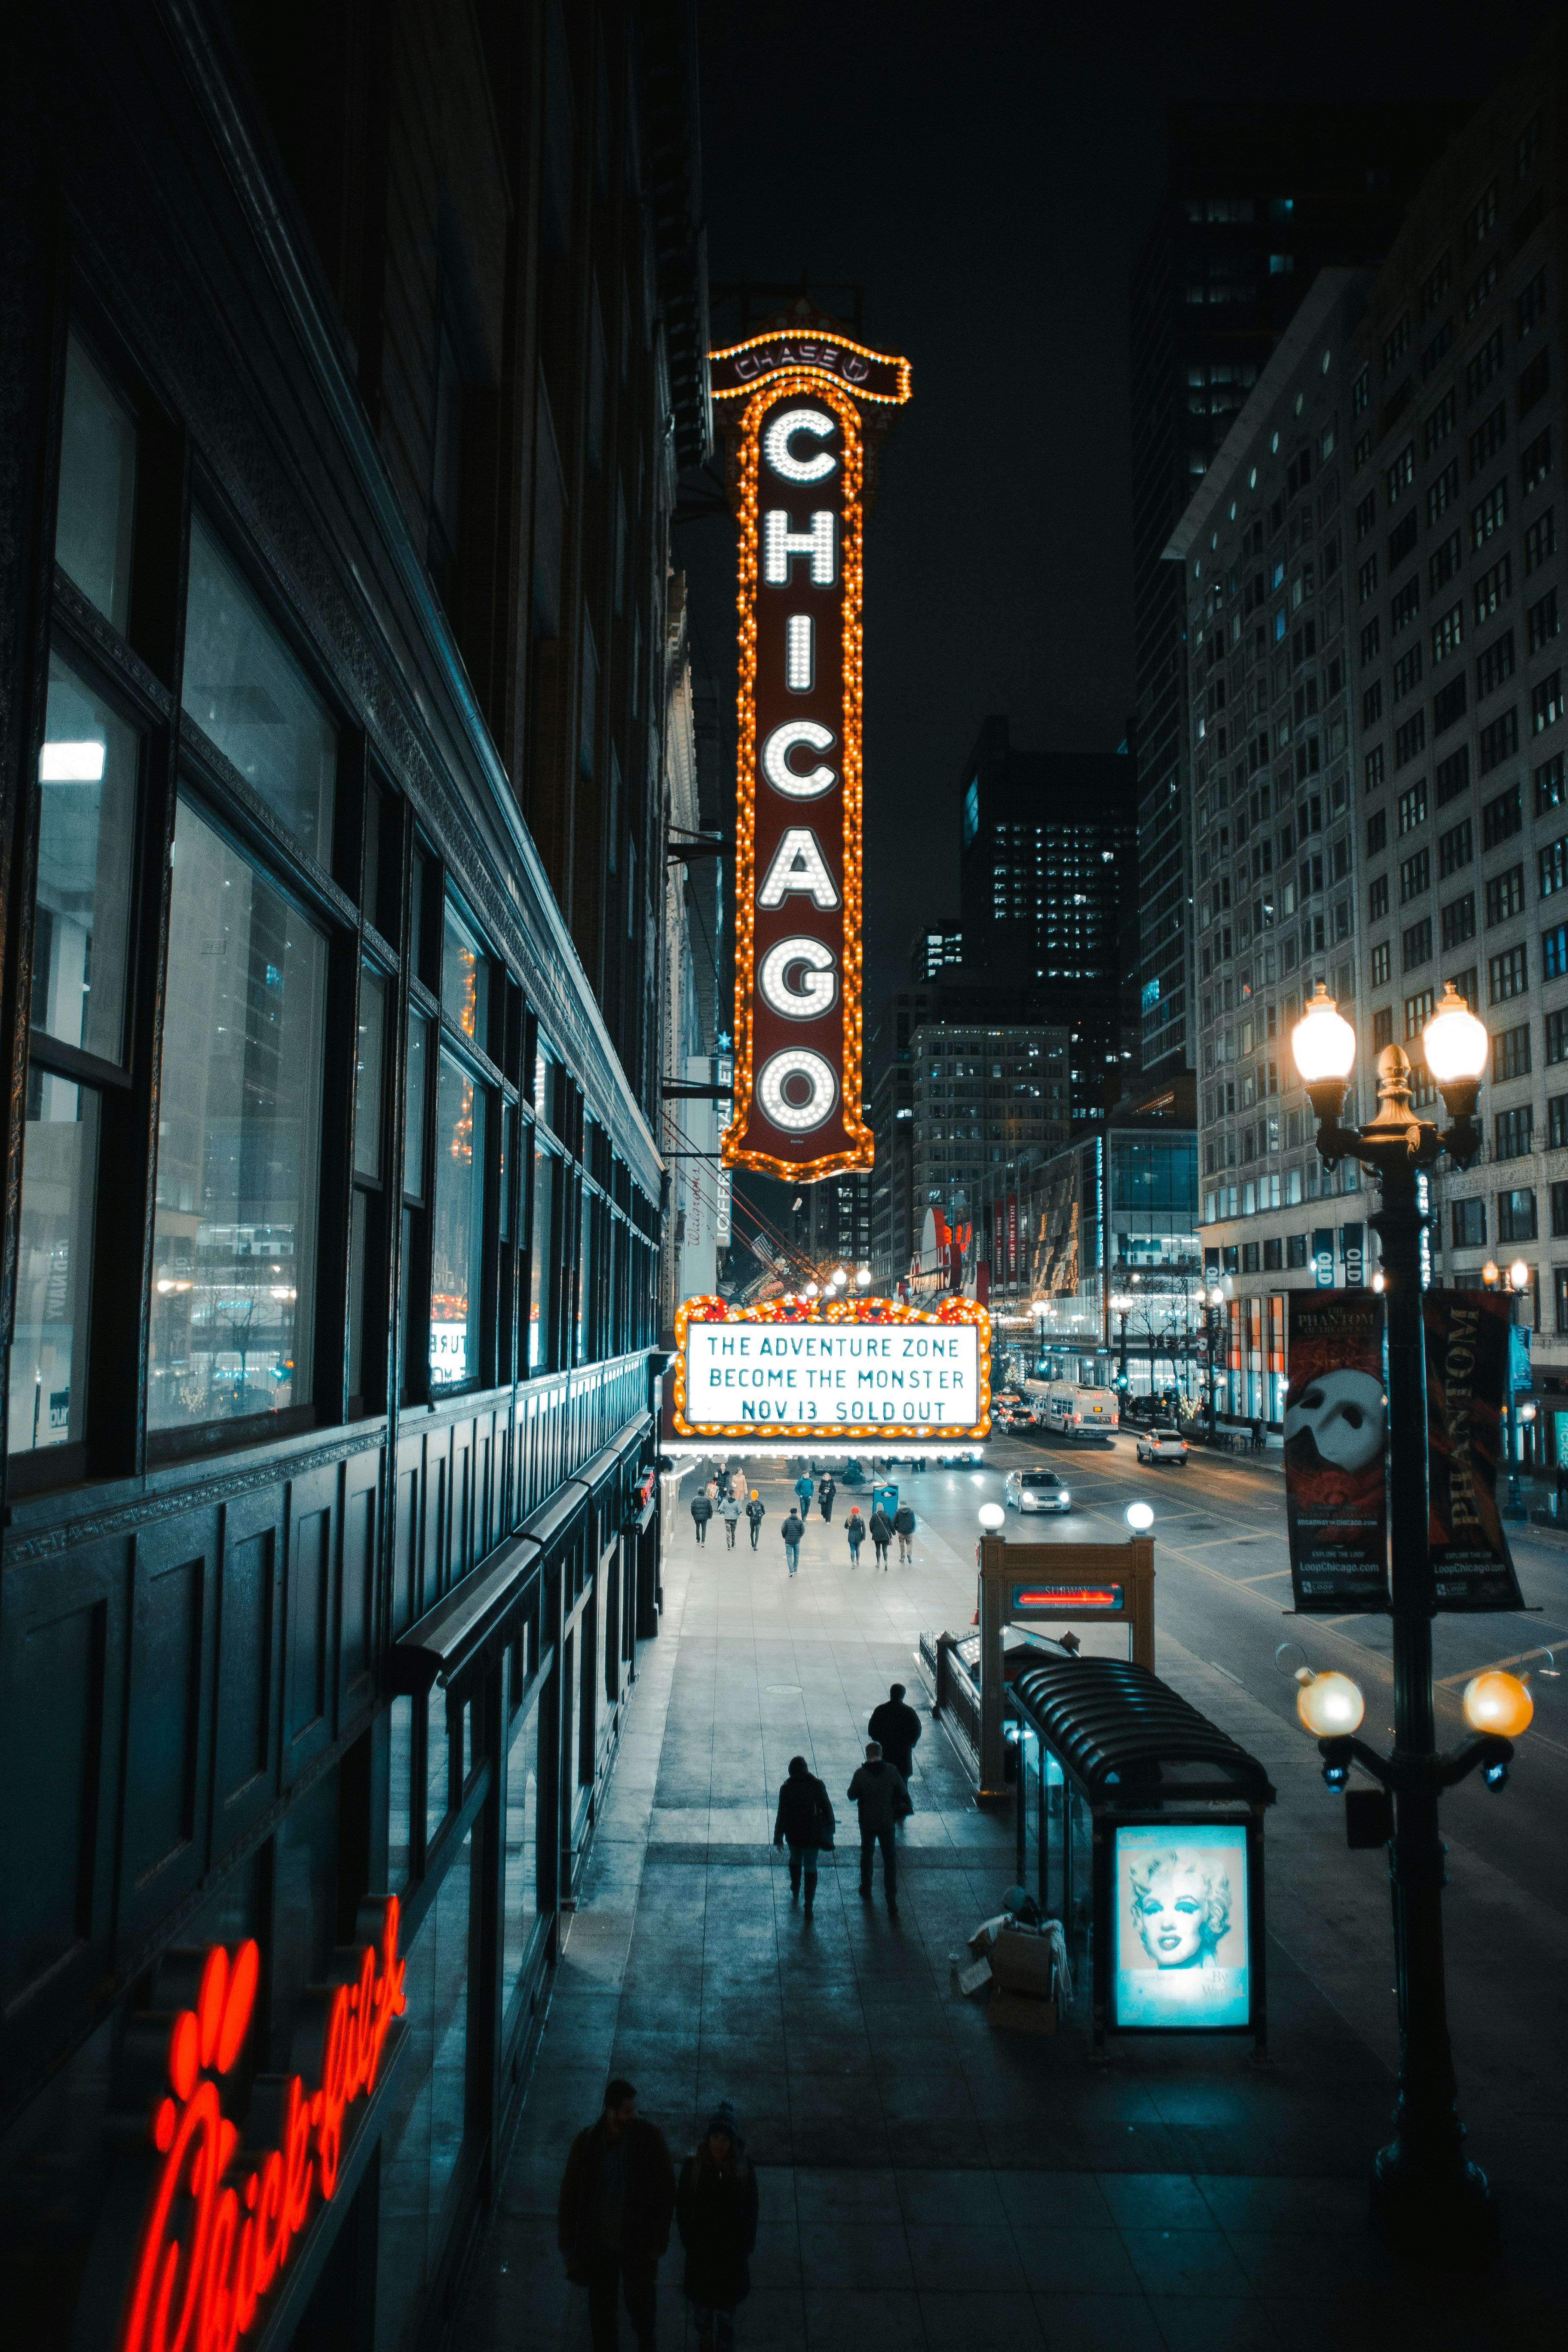

DATA SET: TRAFFIC CRASHES from the City of Chicago Data Portal

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data

ABOUT AS UNDERSTOOD FROM WEBSITE

-data is collected from the e-crash reporting system

-about half of the crashes are self reported and are mostly minor crashes
 the rest are recorded by the officer at the crash site
 
-Many of the crash parameters, including street condition data, weather condition, and posted speed limits, 
 are recorded by the reporting officer based on best available information at the time, but many of these 
 may disagree with posted information or other assessments on road conditions
 
-crashes out of the city limits are not recorded

-only crashes with a property damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a    public roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable crashes


# BUSINESS UNDERSTANDING

The City of Chicago has implemented E-Crash a reporting tool for car accidents that happen within the City of Chicago, but with all this recorded data they have not been able to make strides in minimizing accidents on the streets of Chicago city. 

With the data recorded through the E-Crash system and use of machine learning principles, I can find primary contributory causes of car accidents and recommend solutions based on intepretation of results.

This will in turn help keep the citizens of Chicago safe through preventative measures therefore reduced car crashes, help in implementation of city planning principles to reduces the crashes and limiti the ammount of resources the City of Chicago utilises to solve these cases

OBJECTIVE:Build a classifier to predict the primary contributory cause of a car accident, given information about the car, the people in the car, the road conditions etc

# DATA UNDERSTANDING

The data source is the Traffic Crashes - Crashes dataset form the Chicago Data Portal and this data is suited to this task as it collected by the Chicago Police Department officers who are skilled about law enforcement and also that the citizens can contest the content of the data recorded and ammendments made upon confirmation

The data collected contains multiple characteristics like: speed_limit, weather_conditions, lighting_conditions, crash_type among many other characterists that help paint a picture of how the car crash occured. this data ta is suitable for our project as it provides comprehensive and relevant information needed to predict the primary contributory cause of car accidents, which aligns with our business objective to improve traffic safety.

### TARGET VARIABLE

    MOST_SEVERE_INJURY: This seems to be the target variable. 
    It likely describes the most severe injury sustained in the crash.

### UNIQUE IDENTIFIER

    CRASH_RECORD_ID: This column serves as a unique identifier for each crash record.

### DATA CHARACTERISTICS

        CRASH_DATE_EST_I: Indicates whether the crash date is estimated or not.
        
        CRASH_DATE: Date and time of the crash.
    
        POSTED_SPEED_LIMIT: Posted speed limit at the crash location.
    
        TRAFFIC_CONTROL_DEVICE: Type of traffic control device present at the crash location.
    
        DEVICE_CONDITION: Condition of the traffic control device.
    
        WEATHER_CONDITION: Weather condition at the time of the crash.
   
        LIGHTING_CONDITION: Lighting condition at the time of the crash.
   
        FIRST_CRASH_TYPE: Type of the first crash in the sequence.
  
        TRAFFICWAY_TYPE: Type of trafficway where the crash occurred.
   
        LANE_CNT: Number of through lanes at the crash location.
   
        ALIGNMENT: Street alignment at the crash location.
    
        ROADWAY_SURFACE_COND: Condition of the roadway surface at the crash location.
   
        ROAD_DEFECT: Road defect at the crash location.
   
        REPORT_TYPE: Type of crash report.
    
        CRASH_TYPE: Type of crash.
    
        INTERSECTION_RELATED_I: Indicates whether the crash occurred at an intersection.
    
        NOT_RIGHT_OF_WAY_I: Indicates whether the crash occurred when the vehicle was not in the right of way.
    
        HIT_AND_RUN_I: Indicates whether the crash was a hit-and-run.
    
        DAMAGE: Extent of damage in the crash.
    
        DATE_POLICE_NOTIFIED: Date and time when the police were notified about the crash.
    
        PRIM_CONTRIBUTORY_CAUSE: Primary contributory cause of the crash.
    
        SEC_CONTRIBUTORY_CAUSE: Secondary contributory cause of the crash.
    
        STREET_NO: Street number of the crash location.
    
        STREET_DIRECTION: Street direction of the crash location.
    
        STREET_NAME: Street name of the crash location.
    
        BEAT_OF_OCCURRENCE: Police beat where the crash occurred.
    
        PHOTOS_TAKEN_I: Indicates whether photos were taken at the crash scene.
    
        STATEMENTS_TAKEN_I: Indicates whether statements were taken at the crash scene.
    
        DOORING_I: Indicates whether the crash involved dooring.
    
        WORK_ZONE_I: Indicates whether the crash occurred in a work zone.
    
        WORK_ZONE_TYPE: Type of work zone where the crash occurred.
    
        WORKERS_PRESENT_I: Indicates whether workers were present at the crash scene.
    
        NUM_UNITS: Number of units involved in the crash.
    
        INJURIES_TOTAL: Total number of injuries in the crash.
    
        INJURIES_FATAL: Number of fatal injuries in the crash.
    
        INJURIES_INCAPACITATING: Number of incapacitating injuries in the crash.
    
        INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries in the crash.
    
        NJURIES_REPORTED_NOT_EVIDENT: Number of injuries reported but not evident in the crash.
    
        INJURIES_NO_INDICATION: Number of injuries with no indication in the crash.
    
        INJURIES_UNKNOWN: Number of injuries with unknown severity in the crash.
    
        CRASH_HOUR: Hour of the day when the crash occurred.
    
        CRASH_DAY_OF_WEEK: Day of the week when the crash occurred.
    
        CRASH_MONTH: Month when the crash occurred.
    
        LATITUDE: Latitude of the crash location.
    
        LONGITUDE: Longitude of the crash location.
    
        LOCATION: Geographic location of the crash.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
chicago = pd.read_csv(r'C:\Users\DANIEL\Desktop\MORINGA PHASE 3\PHASE 3 PROJECT\DATASET\Traffic_Crashes.csv')
chicago.info()
chicago.describe()
chicago.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835407 entries, 0 to 835406
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                835407 non-null  object 
 1   CRASH_DATE_EST_I               62311 non-null   object 
 2   CRASH_DATE                     835407 non-null  object 
 3   POSTED_SPEED_LIMIT             835407 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         835407 non-null  object 
 5   DEVICE_CONDITION               835407 non-null  object 
 6   WEATHER_CONDITION              835407 non-null  object 
 7   LIGHTING_CONDITION             835407 non-null  object 
 8   FIRST_CRASH_TYPE               835407 non-null  object 
 9   TRAFFICWAY_TYPE                835407 non-null  object 
 10  LANE_CNT                       199011 non-null  float64
 11  ALIGNMENT                      835407 non-null  object 
 12  ROADWAY_SURFACE_COND          

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  08/18/2023 12:50:00 PM                  15                  OTHER   
1  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2  08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3  11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4  08/18/2023 10:45:00 AM                  20            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2           NO CONTROLS             CLEAR           DAYLIGHT   
3           NO CONTROLS             CLEAR           DAYLIGHT   
4           NO CONTROLS             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0              REAR END                            OTHER  ...   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
2          PEDALCYCLIST                      NOT DIVIDED  ...   
3            PEDESTRIAN                          ONE-WAY  ...   
4          FIXED OBJECT                            OTHER  ...   

   INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                          1.0                           0.0   
1                          0.0                           0.0   
2                          1.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    1.0              0.0         12                 6   
1                    1.0              0.0         14                 7   
2                    1.0              0.0         17                 6   
3                    1.0              0.0          8                 3   
4                    1.0              0.0         10                 6   

  CRASH_MONTH   LATITUDE  LONGITUDE                                  LOCATION  
0           8        NaN        NaN                                       NaN  
1           7  41.854120 -87.665902  POINT (-87.665902342962 41.854120262952)  
2           8  41.942976 -87.761883  POINT (-87.761883496974 41.942975745006)  
3          11        NaN        NaN                                       NaN  
4           8        NaN        NaN                                       NaN  

[5 rows x 48 columns]

THE COLUMNS HAVE 3 DATA TYPES

    float as seen on LANE_CNT, BEAT_OF_OCCURRENCE, INJURIES_TOTAL, INJURIES_FATAL, LATITUDE, LONGITUDE

    int as seen on POSTED_SPEED_LIMIT, STREET_NO, NUM_UNITS, CRASH_HOUR

    object as seen on CRASH_RECORD_ID, TRAFFIC_CONTROL_DEVICE, STREET_DIRECTION

the data has 835407 rows and 48 columns


# DATA CLEANING

In [3]:
chicago

CRASH_RECORD_ID CRASH_DATE_EST_I  \
0       6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   
1       5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
2       61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...              NaN   
3       004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
4       a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...              NaN   
...                                                   ...              ...   
835402  ede74fa6fd507334cd0415d3d53deb535d27d23523cd38...              NaN   
835403  5bda1ba236fc7e7206dd5ed31f57591dbe50ff8134e707...              NaN   
835404  f5ac3574d167a5297b3b1fc2f0452c8c7c1207ad725ca3...              NaN   
835405  f20453c5723af4ecc9c739665b2565af1529b4e705f63d...              NaN   
835406  e38400c0474e70f5aa9f0e0f115957281ff234b6727e00...              NaN   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       08/18/2023 12:50:00 PM                  15                  OTHER   
1       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2       08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3       11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4       08/18/2023 10:45:00 AM                  20            NO CONTROLS   
...                        ...                 ...                    ...   
835402  06/23/2023 04:30:00 PM                  30                UNKNOWN   
835403  12/16/2022 12:10:00 PM                  30         TRAFFIC SIGNAL   
835404  02/29/2020 04:45:00 PM                  30            NO CONTROLS   
835405  05/17/2023 10:20:00 AM                  30            NO CONTROLS   
835406  04/20/2020 03:30:00 PM                  35            NO CONTROLS   

            DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2                NO CONTROLS             CLEAR           DAYLIGHT   
3                NO CONTROLS             CLEAR           DAYLIGHT   
4                NO CONTROLS             CLEAR           DAYLIGHT   
...                      ...               ...                ...   
835402               UNKNOWN           UNKNOWN           DAYLIGHT   
835403  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
835404           NO CONTROLS             CLEAR           DAYLIGHT   
835405           NO CONTROLS             CLEAR           DAYLIGHT   
835406           NO CONTROLS             CLEAR           DAYLIGHT   

            FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
0                   REAR END                            OTHER  ...   
1       PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
2               PEDALCYCLIST                      NOT DIVIDED  ...   
3                 PEDESTRIAN                          ONE-WAY  ...   
4               FIXED OBJECT                            OTHER  ...   
...                      ...                              ...  ...   
835402              REAR END                      NOT DIVIDED  ...   
835403               TURNING                         FOUR WAY  ...   
835404                 ANGLE                      NOT DIVIDED  ...   
835405  PARKED MOTOR VEHICLE                      NOT DIVIDED  ...   
835406               TURNING  DIVIDED - W/MEDIAN (NOT RAISED)  ...   

        INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
0                               1.0                           0.0   
1                               0.0                           0.0   
2                               1.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   
...                             ...                           ...   
835402                     

Identified data to drop

CRASH_DATE_EST_I (Since CRASH_DATE will be used)

DATE_POLICE_NOTIFIED (As it may not add predictive value)

STREET_NO, STREET_DIRECTION (Specific location details may not be helpful)

BEAT_OF_OCCURRENCE (Too specific to a location, less useful for prediction)

PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I (Operational details, less relevant for prediction)

DOORING_I (Too specific unless dooring is a significant cause)

WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I (Unless work zones significantly impact severity)

LATITUDE, LONGITUDE, LOCATION (Geographical coordinates are too specific and can be considered leakage)


In [4]:
#dropping columns
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I','DATE_POLICE_NOTIFIED','STREET_NO','STREET_DIRECTION','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','LATITUDE','LONGITUDE','LOCATION']
chicago.drop(columns_to_drop, axis = 1, inplace = True)
chicago

CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0       08/18/2023 12:50:00 PM                  15                  OTHER   
1       07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
2       08/18/2023 05:58:00 PM                  30            NO CONTROLS   
3       11/26/2019 08:38:00 AM                  25            NO CONTROLS   
4       08/18/2023 10:45:00 AM                  20            NO CONTROLS   
...                        ...                 ...                    ...   
835402  06/23/2023 04:30:00 PM                  30                UNKNOWN   
835403  12/16/2022 12:10:00 PM                  30         TRAFFIC SIGNAL   
835404  02/29/2020 04:45:00 PM                  30            NO CONTROLS   
835405  05/17/2023 10:20:00 AM                  30            NO CONTROLS   
835406  04/20/2020 03:30:00 PM                  35            NO CONTROLS   

            DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2                NO CONTROLS             CLEAR           DAYLIGHT   
3                NO CONTROLS             CLEAR           DAYLIGHT   
4                NO CONTROLS             CLEAR           DAYLIGHT   
...                      ...               ...                ...   
835402               UNKNOWN           UNKNOWN           DAYLIGHT   
835403  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
835404           NO CONTROLS             CLEAR           DAYLIGHT   
835405           NO CONTROLS             CLEAR           DAYLIGHT   
835406           NO CONTROLS             CLEAR           DAYLIGHT   

            FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
0                   REAR END                            OTHER       NaN   
1       PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   
2               PEDALCYCLIST                      NOT DIVIDED       NaN   
3                 PEDESTRIAN                          ONE-WAY       NaN   
4               FIXED OBJECT                            OTHER       NaN   
...                      ...                              ...       ...   
835402              REAR END                      NOT DIVIDED       NaN   
835403               TURNING                         FOUR WAY       NaN   
835404                 ANGLE                      NOT DIVIDED       NaN   
835405  PARKED MOTOR VEHICLE                      NOT DIVIDED       NaN   
835406               TURNING  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   

                 ALIGNMENT  ... INJURIES_TOTAL INJURIES_FATAL  \
0       STRAIGHT AND LEVEL  ...            1.0            0.0   
1       STRAIGHT AND LEVEL  ...            0.0            0.0   
2       STRAIGHT AND LEVEL  ...            1.0            0.0   
3           CURVE ON GRADE  ...            1.0            1.0   
4       STRAIGHT AND LEVEL  ...            0.0            0.0   
...                    ...  ...            ...            ...   
835402  STRAIGHT AND LEVEL  ...            1.0            0.0   
835403  STRAIGHT AND LEVEL  ...            0.0            0.0   
835404  STRAIGHT AND LEVEL  ...            0.0            0.0   
835405  STRAIGHT AND LEVEL  ...            0.0            0.0   
835406  STRAIGHT AND LEVEL  ...            0.0            0.0   

       INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING  \
0                          0.0                         1.0   
1                          0.0                         0.0   
2                          0.0                         1.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
835402                     1.0                         0.0   
835403                     0.0                         0.0   
835404                    

In [5]:
# Convert CRASH_DATE to datetime format
chicago['CRASH_DATE'] = pd.to_datetime(chicago['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Check the result
print(chicago['CRASH_DATE'].head())

0   2023-08-18 12:50:00
1   2023-07-29 14:45:00
2   2023-08-18 17:58:00
3   2019-11-26 08:38:00
4   2023-08-18 10:45:00
Name: CRASH_DATE, dtype: datetime64[ns]


In [6]:
#check for missing values
chicago.isna().sum()

CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         636396
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       25081
CRASH_TYPE                            0
INTERSECTION_RELATED_I           643876
NOT_RIGHT_OF_WAY_I               796989
HIT_AND_RUN_I                    573813
DAMAGE                                0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NAME                           1
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1836
INJURIES_TOTAL                     1823
INJURIES_FATAL                     1823


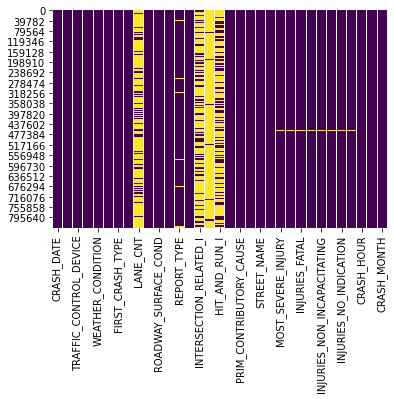

In [7]:
# Heatmap to visualize missing values
sns.heatmap(chicago.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
#find percentage of missing vales to know how to solve
def missing(chicago):
    miss = chicago.isnull().sum().sort_values(ascending = False)
    percentage_miss = ((chicago.isnull().sum() / len(chicago))*100).sort_values(ascending = False)
    missing = pd.DataFrame({'Missing Values': miss, 'Percentage': percentage_miss}).reset_index()
    missing.drop(missing[missing['Percentage'] == 0].index, inplace = True)
    return missing

missing_data = missing(chicago)
missing_data

index  Missing Values  Percentage
0              NOT_RIGHT_OF_WAY_I          796989   95.401283
1          INTERSECTION_RELATED_I          643876   77.073331
2                        LANE_CNT          636396   76.177959
3                   HIT_AND_RUN_I          573813   68.686640
4                     REPORT_TYPE           25081    3.002249
5              MOST_SEVERE_INJURY            1836    0.219773
6          INJURIES_NO_INDICATION            1823    0.218217
7                INJURIES_UNKNOWN            1823    0.218217
8     INJURIES_NON_INCAPACITATING            1823    0.218217
9         INJURIES_INCAPACITATING            1823    0.218217
10                 INJURIES_FATAL            1823    0.218217
11                 INJURIES_TOTAL            1823    0.218217
12  INJURIES_REPORTED_NOT_EVIDENT            1823    0.218217
13                    STREET_NAME               1    0.000120

the first 5 columns will have to be drooped as they have way too much missing data and do not greatly affect our analysis

for the rest of the columns i will fill hem using mode or median

In [9]:
columns_to_drop = ['NOT_RIGHT_OF_WAY_I', 'INTERSECTION_RELATED_I', 'LANE_CNT', 'HIT_AND_RUN_I','REPORT_TYPE']
chicago.drop(columns=columns_to_drop)

CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0      2023-08-18 12:50:00                  15                  OTHER   
1      2023-07-29 14:45:00                  30         TRAFFIC SIGNAL   
2      2023-08-18 17:58:00                  30            NO CONTROLS   
3      2019-11-26 08:38:00                  25            NO CONTROLS   
4      2023-08-18 10:45:00                  20            NO CONTROLS   
...                    ...                 ...                    ...   
835402 2023-06-23 16:30:00                  30                UNKNOWN   
835403 2022-12-16 12:10:00                  30         TRAFFIC SIGNAL   
835404 2020-02-29 16:45:00                  30            NO CONTROLS   
835405 2023-05-17 10:20:00                  30            NO CONTROLS   
835406 2020-04-20 15:30:00                  35            NO CONTROLS   

            DEVICE_CONDITION WEATHER_CONDITION LIGHTING_CONDITION  \
0       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
1       FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
2                NO CONTROLS             CLEAR           DAYLIGHT   
3                NO CONTROLS             CLEAR           DAYLIGHT   
4                NO CONTROLS             CLEAR           DAYLIGHT   
...                      ...               ...                ...   
835402               UNKNOWN           UNKNOWN           DAYLIGHT   
835403  FUNCTIONING PROPERLY             CLEAR           DAYLIGHT   
835404           NO CONTROLS             CLEAR           DAYLIGHT   
835405           NO CONTROLS             CLEAR           DAYLIGHT   
835406           NO CONTROLS             CLEAR           DAYLIGHT   

            FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  \
0                   REAR END                            OTHER   
1       PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)   
2               PEDALCYCLIST                      NOT DIVIDED   
3                 PEDESTRIAN                          ONE-WAY   
4               FIXED OBJECT                            OTHER   
...                      ...                              ...   
835402              REAR END                      NOT DIVIDED   
835403               TURNING                         FOUR WAY   
835404                 ANGLE                      NOT DIVIDED   
835405  PARKED MOTOR VEHICLE                      NOT DIVIDED   
835406               TURNING  DIVIDED - W/MEDIAN (NOT RAISED)   

                 ALIGNMENT ROADWAY_SURFACE_COND  ... INJURIES_TOTAL  \
0       STRAIGHT AND LEVEL                  DRY  ...            1.0   
1       STRAIGHT AND LEVEL                  DRY  ...            0.0   
2       STRAIGHT AND LEVEL                  DRY  ...            1.0   
3           CURVE ON GRADE                  DRY  ...            1.0   
4       STRAIGHT AND LEVEL                  DRY  ...            0.0   
...                    ...                  ...  ...            ...   
835402  STRAIGHT AND LEVEL              UNKNOWN  ...            1.0   
835403  STRAIGHT AND LEVEL                  WET  ...            0.0   
835404  STRAIGHT AND LEVEL                  DRY  ...            0.0   
835405  STRAIGHT AND LEVEL                  DRY  ...            0.0   
835406  STRAIGHT AND LEVEL                  DRY  ...            0.0   

       INJURIES_FATAL INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING  \
0                 0.0                     0.0                         1.0   
1                 0.0                     0.0                         0.0   
2                 0.0                     0.0                         1.0   
3                 1.0                     0.0                         0.0   
4                 0.0                     0.0                         0.0   
...               ...                     ...                         ...   
835402            0.0                     1.0                         0.0   
835403            0.0                     0.0               

In [10]:
#filling numericl columns with median value
numerical_cols = ['INJURIES_UNKNOWN', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NON_INCAPACITATING',
                  'INJURIES_INCAPACITATING', 'INJURIES_FATAL', 'INJURIES_TOTAL', 'INJURIES_NO_INDICATION']

for col in numerical_cols:
    chicago[col].fillna(chicago[col].median(), inplace=True)

In [11]:
#filling categorical columns with mode value
categorical_cols = ['REPORT_TYPE', 'MOST_SEVERE_INJURY', 'STREET_NAME']

for col in categorical_cols:
    chicago[col].fillna(chicago[col].mode()[0], inplace=True)

# Drop rows with any remaining missing values (if any)
chicago.dropna(inplace=True)

In [12]:
chicago.isna().sum()

CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                         0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NAME                      0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATI

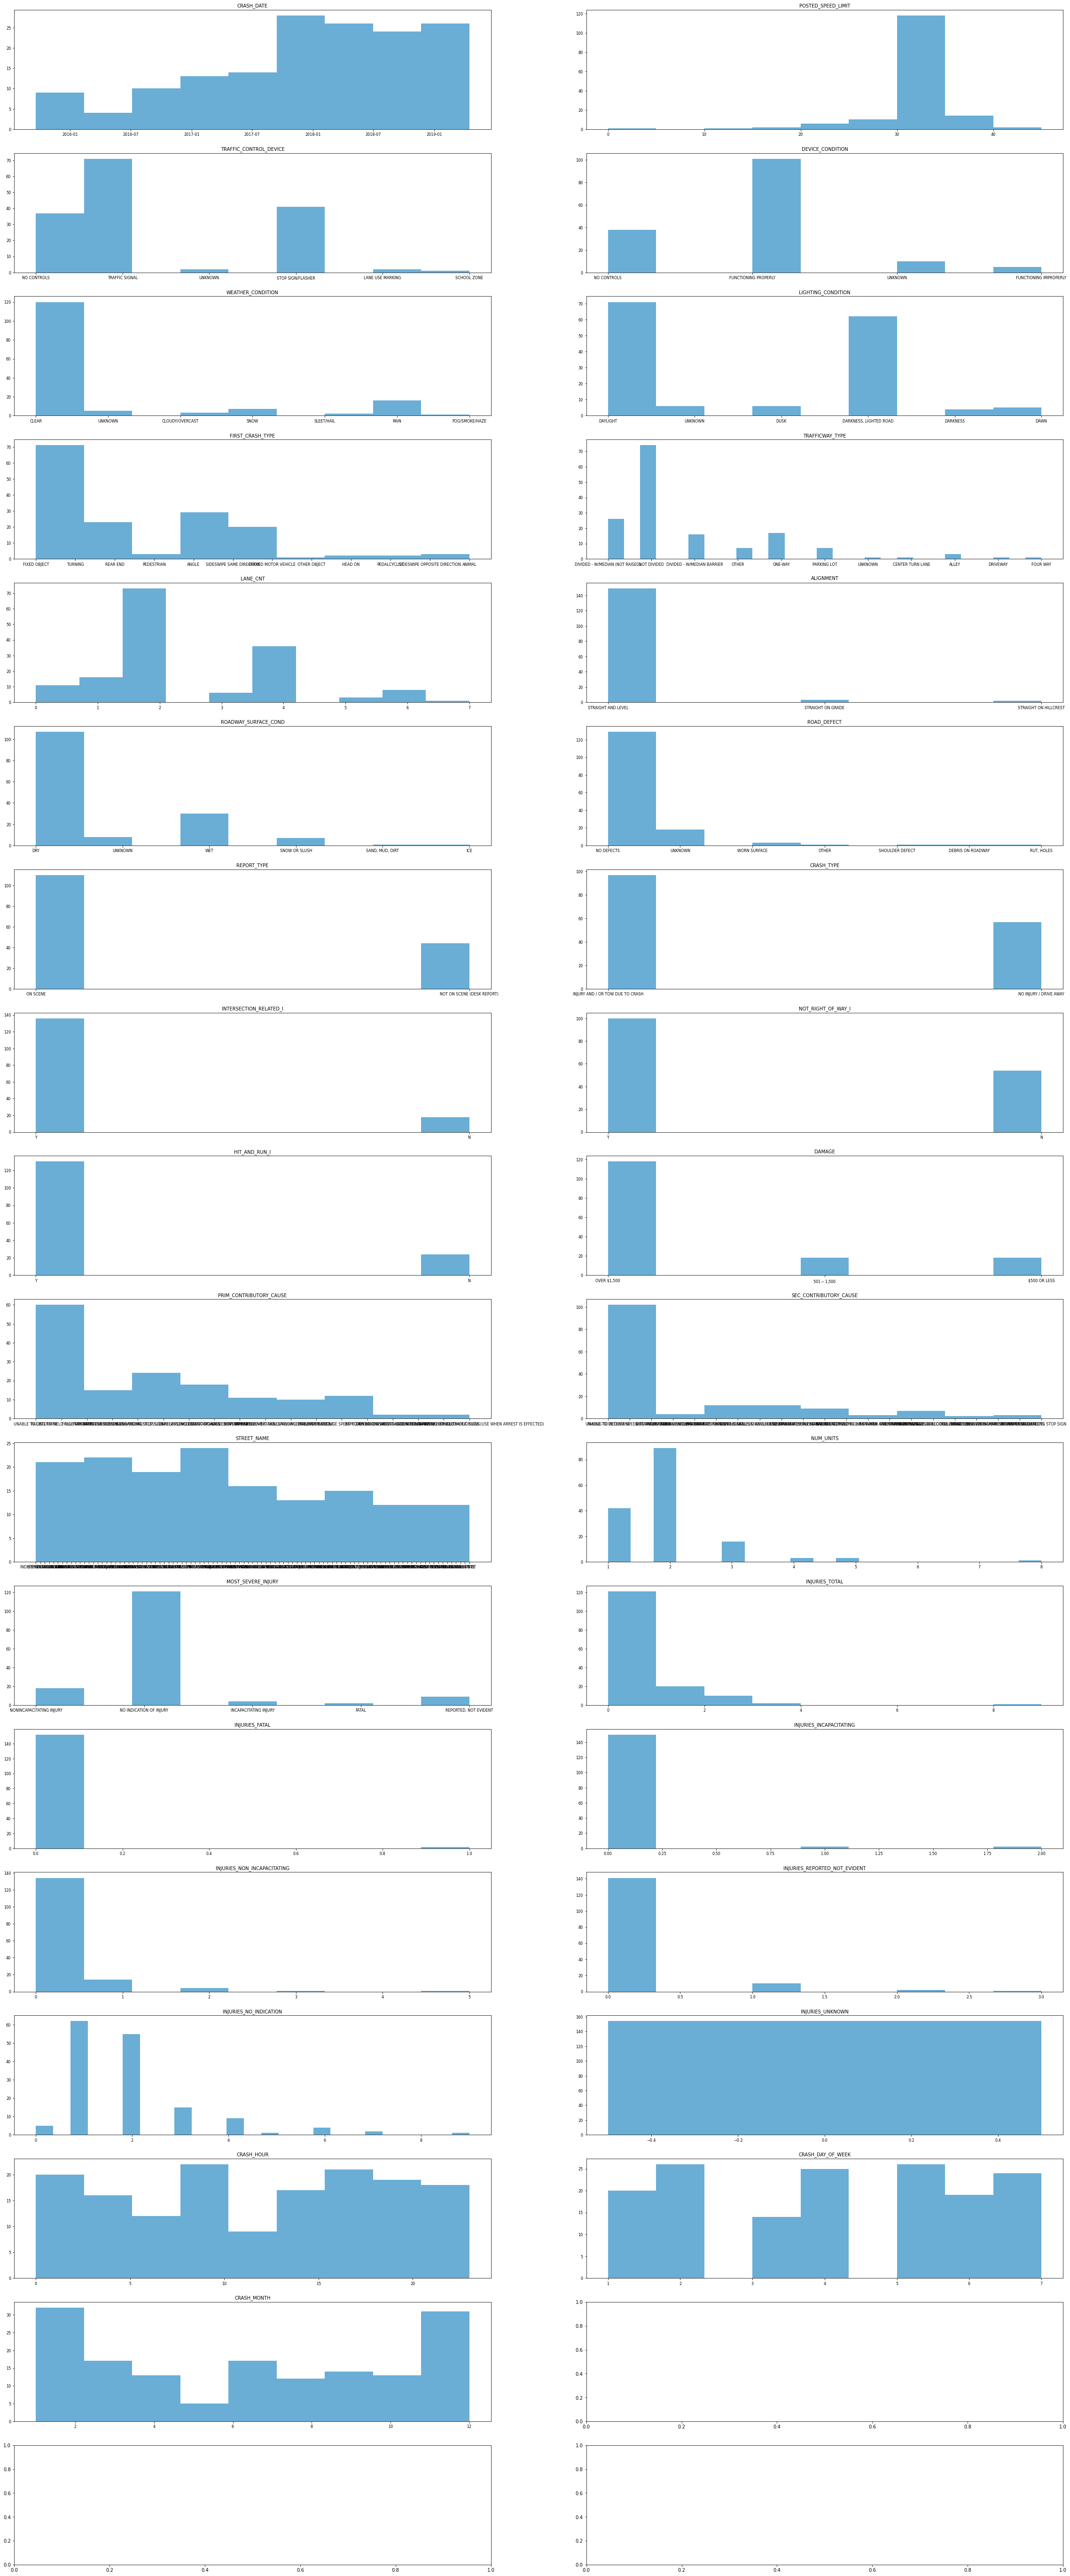

In [13]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=18, ncols=2, figsize=(40, 100))  # Adjust the figsize as needed
df_cols = chicago.columns

# Use a seaborn color palette for the plots
color = sns.color_palette("Blues", n_colors=1)[0]

# Create a function to plot the histogram for the given columns
for col, ax in zip(df_cols, axes.flatten()):
    ax.hist(chicago[col].dropna(), bins='auto', color=color)
    ax.set_title(col, fontsize=10)  # Adjust fontsize as needed
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Adjust layout to avoid overlap
#plt.tight_layout()
plt.show()


most visualizations are skewed to the right side

In [14]:
chicago.duplicated()

19664     False
30556     False
34025     False
37440     False
37462     False
          ...  
790661    False
792857    False
793354    False
805800    False
806299    False
Length: 154, dtype: bool

there are no duplicates

In [15]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 19664 to 806299
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_DATE                     154 non-null    datetime64[ns]
 1   POSTED_SPEED_LIMIT             154 non-null    int64         
 2   TRAFFIC_CONTROL_DEVICE         154 non-null    object        
 3   DEVICE_CONDITION               154 non-null    object        
 4   WEATHER_CONDITION              154 non-null    object        
 5   LIGHTING_CONDITION             154 non-null    object        
 6   FIRST_CRASH_TYPE               154 non-null    object        
 7   TRAFFICWAY_TYPE                154 non-null    object        
 8   LANE_CNT                       154 non-null    float64       
 9   ALIGNMENT                      154 non-null    object        
 10  ROADWAY_SURFACE_COND           154 non-null    object        
 11  ROAD_DEFECT 

In [16]:
#changing data types for easy manipulation
chicago['INJURIES_TOTAL'] = chicago['INJURIES_TOTAL'].astype(int)
chicago['INJURIES_FATAL'] = chicago['INJURIES_FATAL'].astype(int)
chicago['INJURIES_INCAPACITATING'] = chicago['INJURIES_INCAPACITATING'].astype(int)
chicago['INJURIES_NON_INCAPACITATING'] = chicago['INJURIES_NON_INCAPACITATING'].astype(int)
chicago['INJURIES_REPORTED_NOT_EVIDENT'] = chicago['INJURIES_REPORTED_NOT_EVIDENT'].astype(int)
chicago['INJURIES_NO_INDICATION'] = chicago['INJURIES_NO_INDICATION'].astype(int)
chicago['INJURIES_UNKNOWN'] = chicago['INJURIES_UNKNOWN'].astype(int)
chicago['LANE_CNT'] = chicago['LANE_CNT'].astype(int)

In [17]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 19664 to 806299
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_DATE                     154 non-null    datetime64[ns]
 1   POSTED_SPEED_LIMIT             154 non-null    int64         
 2   TRAFFIC_CONTROL_DEVICE         154 non-null    object        
 3   DEVICE_CONDITION               154 non-null    object        
 4   WEATHER_CONDITION              154 non-null    object        
 5   LIGHTING_CONDITION             154 non-null    object        
 6   FIRST_CRASH_TYPE               154 non-null    object        
 7   TRAFFICWAY_TYPE                154 non-null    object        
 8   LANE_CNT                       154 non-null    int32         
 9   ALIGNMENT                      154 non-null    object        
 10  ROADWAY_SURFACE_COND           154 non-null    object        
 11  ROAD_DEFECT 

# EDA

In [18]:
#description of numerical values
chicago.describe().T

count       mean       std  min   25%   50%  \
POSTED_SPEED_LIMIT             154.0  29.415584  4.677440  0.0  30.0  30.0   
LANE_CNT                       154.0   2.558442  1.495033  0.0   2.0   2.0   
NUM_UNITS                      154.0   1.967532  0.931783  1.0   1.0   2.0   
INJURIES_TOTAL                 154.0   0.357143  0.954375  0.0   0.0   0.0   
INJURIES_FATAL                 154.0   0.012987  0.113588  0.0   0.0   0.0   
INJURIES_INCAPACITATING        154.0   0.038961  0.252649  0.0   0.0   0.0   
INJURIES_NON_INCAPACITATING    154.0   0.194805  0.616525  0.0   0.0   0.0   
INJURIES_REPORTED_NOT_EVIDENT  154.0   0.110390  0.405222  0.0   0.0   0.0   
INJURIES_NO_INDICATION         154.0   1.980519  1.411766  0.0   1.0   2.0   
INJURIES_UNKNOWN               154.0   0.000000  0.000000  0.0   0.0   0.0   
CRASH_HOUR                     154.0  11.714286  6.971196  0.0   6.0  12.0   
CRASH_DAY_OF_WEEK              154.0   4.064935  2.005467  1.0   2.0   4.0   
CRASH_MONTH                    154.0   6.448052  3.838304  1.0   3.0   7.0   

                                75%   max  
POSTED_SPEED_LIMIT             30.0  45.0  
LANE_CNT                        4.0   7.0  
NUM_UNITS                       2.0   8.0  
INJURIES_TOTAL                  0.0   9.0  
INJURIES_FATAL                  0.0   1.0  
INJURIES_INCAPACITATING         0.0   2.0  
INJURIES_NON_INCAPACITATING     0.0   5.0  
INJURIES_REPORTED_NOT_EVIDENT   0.0   3.0  
INJURIES_NO_INDICATION          2.0   9.0  
INJURIES_UNKNOWN                0.0   0.0  
CRASH_HOUR                     17.0  23.0  
CRASH_DAY_OF_WEEK               6.0   7.0  
CRASH_MONTH                    10.0  12.0

it seems that there might be a cause for most accidents to average around 11 pm on the 4th day of the week in July which also happens to be around The 4th of July celebrations, we can also see that the most of the injuries are non-fatal

In [19]:
#DESCRIPTION OF CATEGORICAL VARIABLES
chicago.describe(include='object').T

count unique                               top freq
TRAFFIC_CONTROL_DEVICE    154      6                    TRAFFIC SIGNAL   71
DEVICE_CONDITION          154      4              FUNCTIONING PROPERLY  101
WEATHER_CONDITION         154      7                             CLEAR  120
LIGHTING_CONDITION        154      6                          DAYLIGHT   71
FIRST_CRASH_TYPE          154     12                      FIXED OBJECT   44
TRAFFICWAY_TYPE           154     11                       NOT DIVIDED   74
ALIGNMENT                 154      3                STRAIGHT AND LEVEL  149
ROADWAY_SURFACE_COND      154      6                               DRY  107
ROAD_DEFECT               154      7                        NO DEFECTS  129
REPORT_TYPE               154      2                          ON SCENE  110
CRASH_TYPE                154      2  INJURY AND / OR TOW DUE TO CRASH   97
INTERSECTION_RELATED_I    154      2                                 Y  136
NOT_RIGHT_OF_WAY_I        154      2                                 Y  100
HIT_AND_RUN_I             154      2                                 Y  130
DAMAGE                    154      3                       OVER $1,500  118
PRIM_CONTRIBUTORY_CAUSE   154     18               UNABLE TO DETERMINE   42
SEC_CONTRIBUTORY_CAUSE    154     21               UNABLE TO DETERMINE   47
STREET_NAME               154     99                        CICERO AVE    6
MOST_SEVERE_INJURY        154      5           NO INDICATION OF INJURY  121

THIS SHOWS THAT MOST ACCIDENTS HAPPEN:
    DURING THE DAY WITH CLEAR WEATHER, 
    WITH TRAFFIC SIGNALS PRESENT, 
    THE ROADS ARE IN GOOD CONDITION AND DRY
    ACCIDENTS HAPPEN DUE TO THE DRIVER HITTING A FIXED OBJECT AND ENDING UP WITH MINIMAL INJURY BUT THE CAR NEEDING TO BE TOWED
    MOST DAMAGE ENDS UP BEING AT 1500 USD
    MOST ACCIDENTS HAPPEN AT CICERO DRIVE, A MAINSTREAM, BUSTLING AND LIBERAL PART OF CHICAGO HOME TO LARGE LATINX COMMUNITY

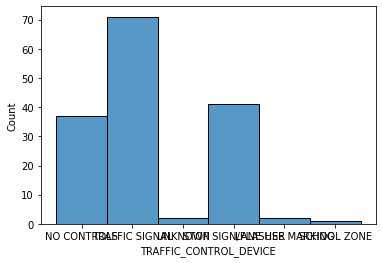

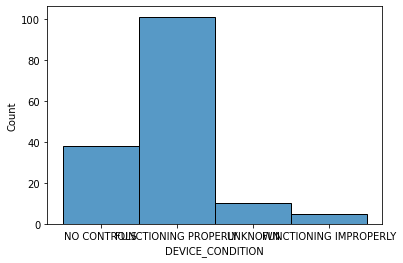

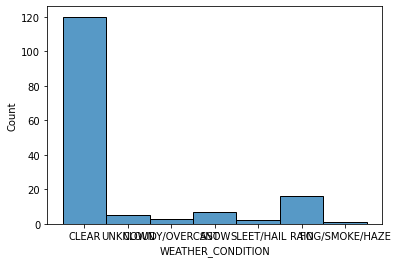

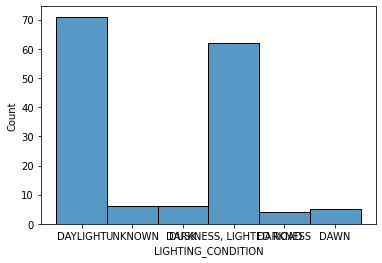

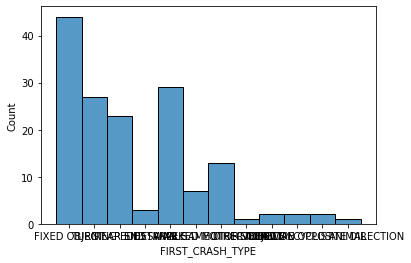

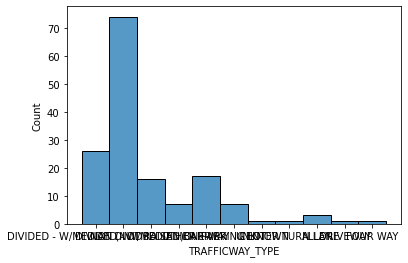

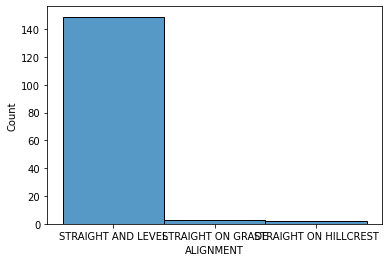

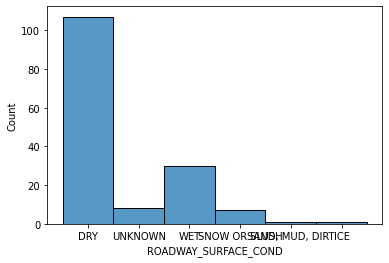

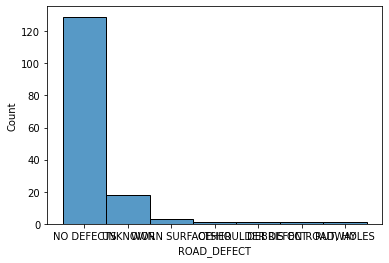

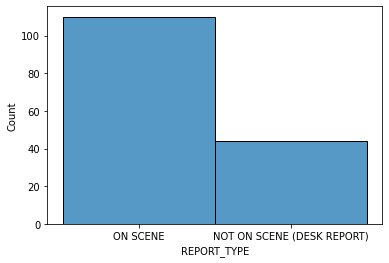

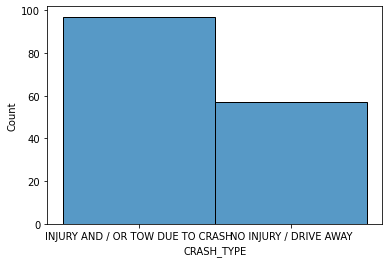

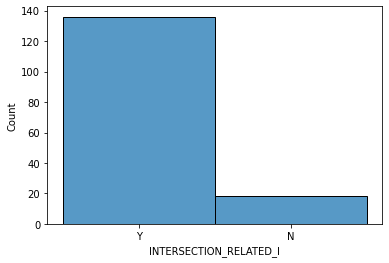

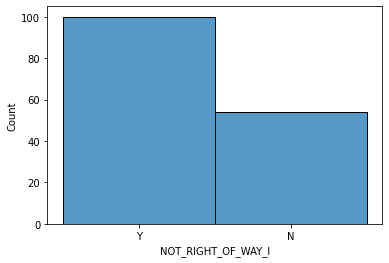

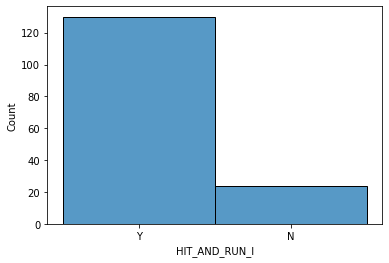

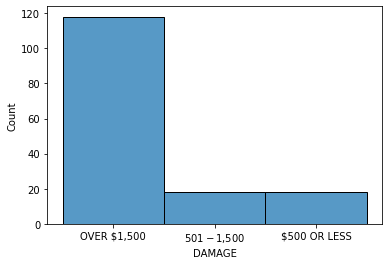

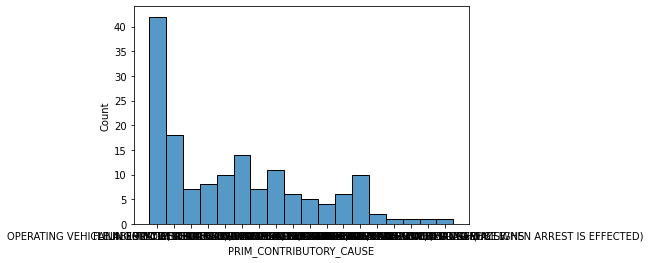

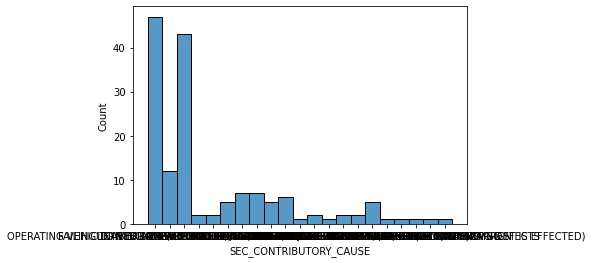

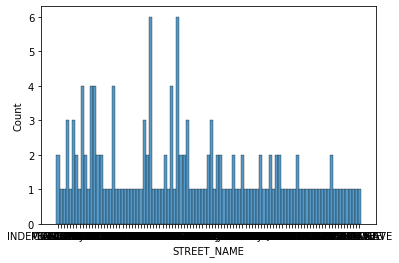

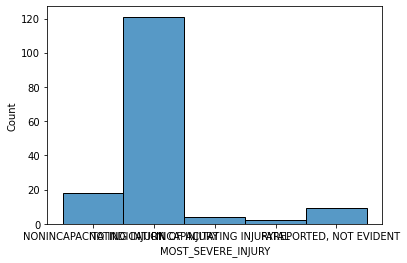

In [20]:
#histogram for distribution 
for i in chicago.select_dtypes(include='object').columns:
    sns.histplot(data=chicago,x=i)
    plt.show()

the data distribution is skewed to the the right 

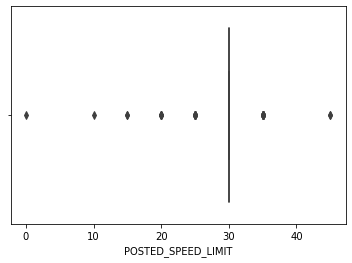

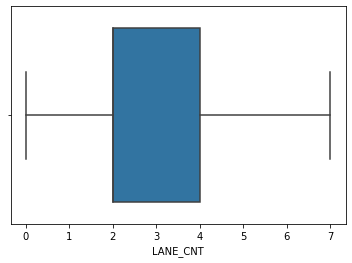

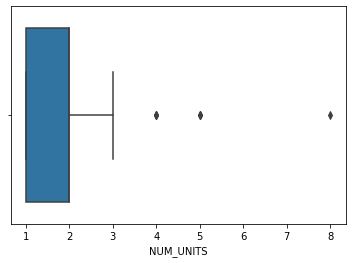

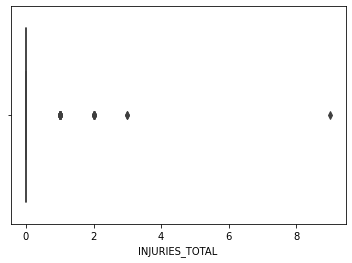

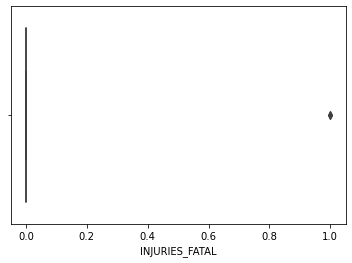

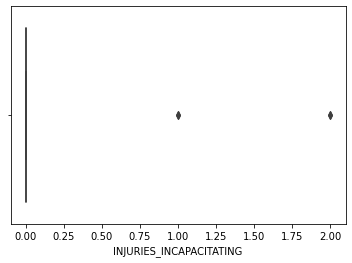

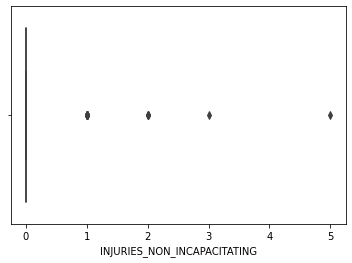

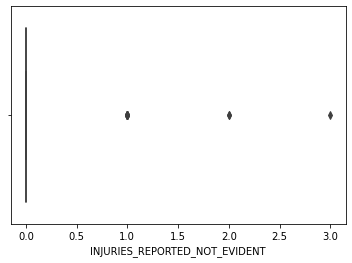

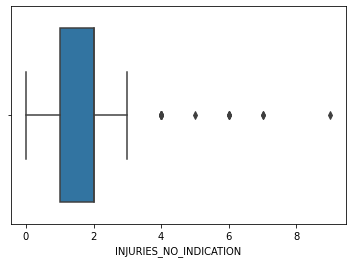

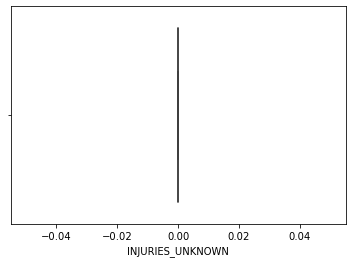

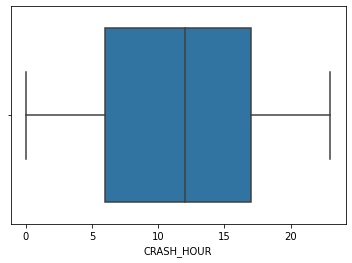

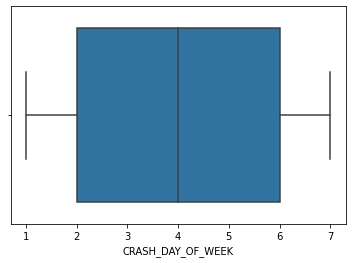

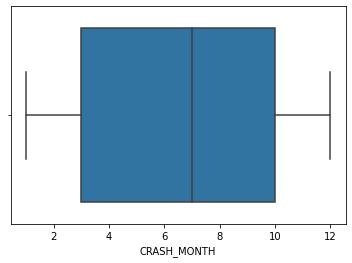

In [21]:
#boxplot for distribution 
for i in chicago.select_dtypes(include='number').columns:
    sns.boxplot(data=chicago,x=i)
    plt.show()

we can see that speed limit is around 30 mph
injuries tend not to be fatal
crashes occur between 6am and 6pm mostly
crashes mostly occur from Monday to Saturday
most crashes occur from March to October

UNIVARIATE ANALYSIS
BIVARIATE ANALYSIS
MULTIVARIATE ANALYSIS

UNIVARIATE ANALYSIS
    I WILL PERFORM UNIVARIATE ANALYSIS ON 
        CRASH_DATE as a time related feature
        WEATHER_CONDITION as an environmental feature
        PRIM_CONTRIBUTORY_CAUSE as a crash specific feature
        MOST_SEVERE_INJURY as an injury related specific feature
        INJURY_TOTAL as an injury related feature

In [22]:
num_attributes= chicago.select_dtypes(include=['int64','int32', 'datetime64'])
cat_attributes= chicago.select_dtypes(exclude=['int64','int32'])

In [23]:
num_attributes.sample()

CRASH_DATE  POSTED_SPEED_LIMIT  LANE_CNT  NUM_UNITS  \
580548 2018-07-04 23:50:00                  30         4          2   

        INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
580548               0               0                        0   

        INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
580548                            0                              0   

        INJURIES_NO_INDICATION  INJURIES_UNKNOWN  CRASH_HOUR  \
580548                       1                 0          23   

        CRASH_DAY_OF_WEEK  CRASH_MONTH  
580548                  4            7

In [24]:
cat_attributes.sample()

CRASH_DATE TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION  \
738435 2018-07-08 16:00:00      STOP SIGN/FLASHER  FUNCTIONING PROPERLY   

       WEATHER_CONDITION LIGHTING_CONDITION FIRST_CRASH_TYPE TRAFFICWAY_TYPE  \
738435             CLEAR           DAYLIGHT     FIXED OBJECT     NOT DIVIDED   

                    ALIGNMENT ROADWAY_SURFACE_COND ROAD_DEFECT REPORT_TYPE  \
738435  STRAIGHT ON HILLCREST                  DRY  NO DEFECTS    ON SCENE   

                              CRASH_TYPE INTERSECTION_RELATED_I  \
738435  INJURY AND / OR TOW DUE TO CRASH                      N   

       NOT_RIGHT_OF_WAY_I HIT_AND_RUN_I       DAMAGE  \
738435                  Y             Y  OVER $1,500   

                 PRIM_CONTRIBUTORY_CAUSE           SEC_CONTRIBUTORY_CAUSE  \
738435  EXCEEDING AUTHORIZED SPEED LIMIT  DRIVING ON WRONG SIDE/WRONG WAY   

         STREET_NAME       MOST_SEVERE_INJURY  
738435  LECLAIRE AVE  NO INDICATION OF INJURY

#### UNIVARIATE ANALYSIS OF CRASH_DATE

count                     154
unique                    154
top       2018-08-09 16:25:00
freq                        1
first     2015-09-19 13:20:00
last      2019-04-17 00:40:00
Name: CRASH_DATE, dtype: object


Text(0.5, 1.0, 'CRASH_DATE stats')

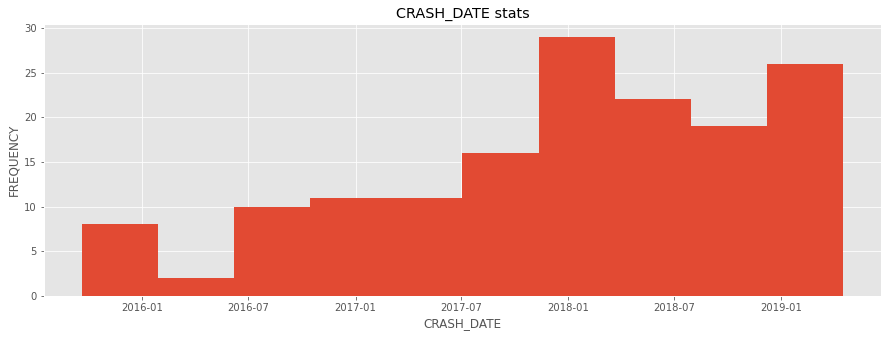

In [25]:
crash_date = chicago['CRASH_DATE']

crash_date_stats = crash_date.describe()
print(crash_date_stats)

#histogram for crash_date
plt.style.use('ggplot')
crash_date.hist(figsize=(15,5))
plt.xlabel('CRASH_DATE')
plt.ylabel('FREQUENCY')
plt.title('CRASH_DATE stats')

most crashes happened at the first 5 months of 2018

count       154
unique        7
top       CLEAR
freq        120
Name: WEATHER_CONDITION, dtype: object


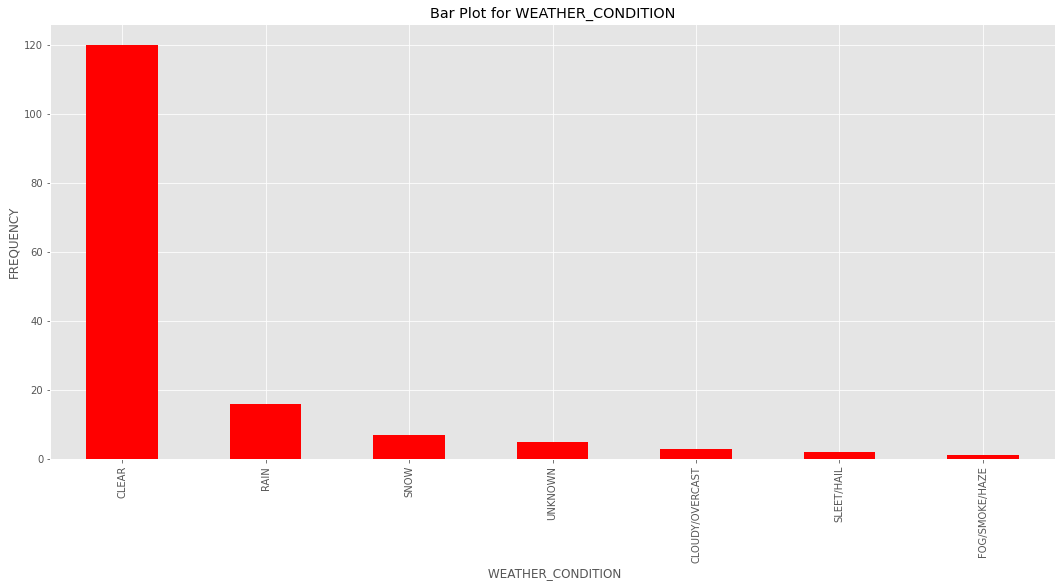

In [26]:
w_cond = chicago['WEATHER_CONDITION']

w_cond_stats = w_cond.describe()
print(w_cond_stats)

chicago['WEATHER_CONDITION'].value_counts().plot(kind='bar', figsize=(18, 8), color='red')
plt.title('Bar Plot for WEATHER_CONDITION')
plt.xlabel(' WEATHER_CONDITION')
plt.ylabel('FREQUENCY')
plt.show()

most crashes happen during the day when the weather is clear

count                     154
unique                     18
top       UNABLE TO DETERMINE
freq                       42
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: object


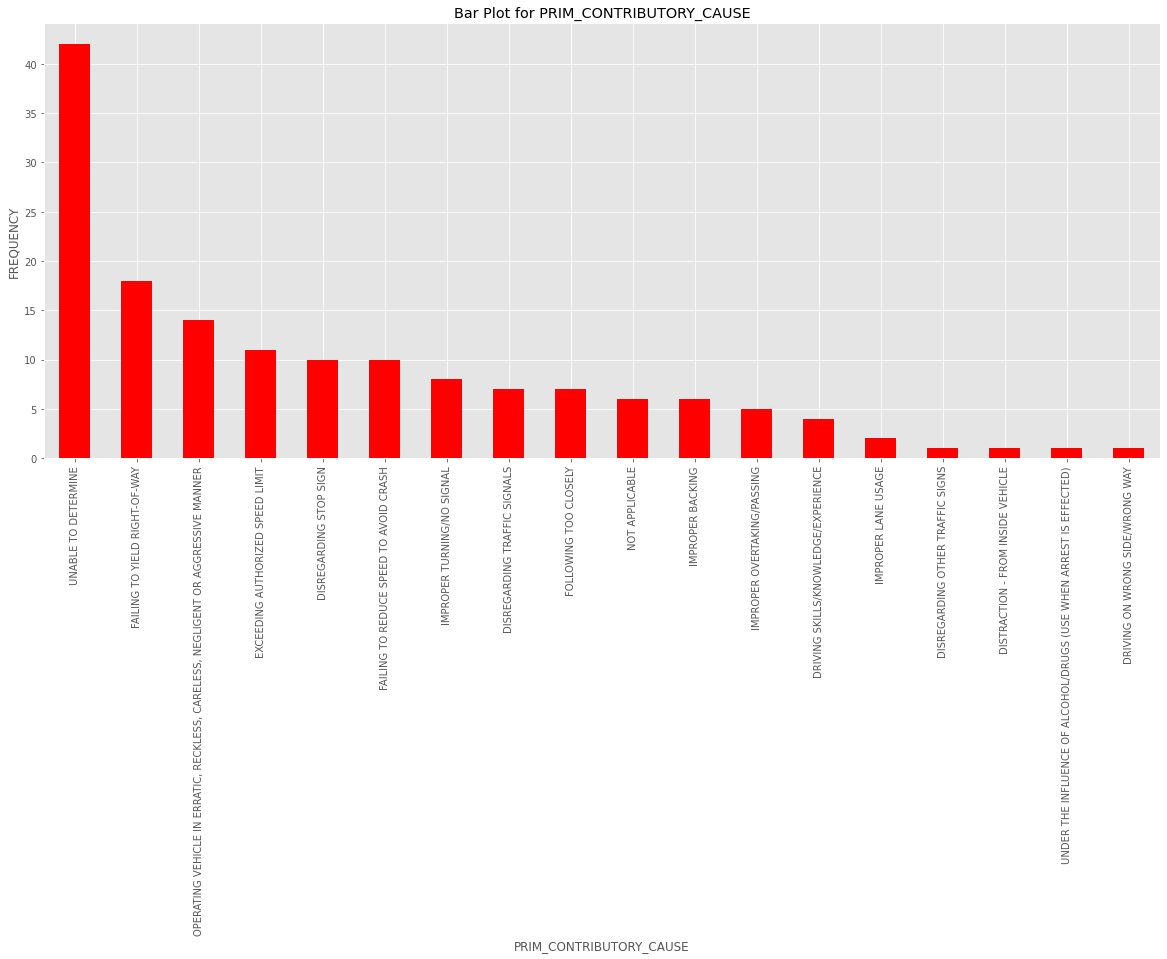

In [27]:
prim_cont = chicago['PRIM_CONTRIBUTORY_CAUSE']

prim_cont_stats = prim_cont.describe()
print(prim_cont_stats)

chicago['PRIM_CONTRIBUTORY_CAUSE'].value_counts().plot(kind='bar', figsize=(20, 8), color='red')
plt.title('Bar Plot for PRIM_CONTRIBUTORY_CAUSE')
plt.xlabel('PRIM_CONTRIBUTORY_CAUSE')
plt.ylabel('FREQUENCY')
plt.show()

most primary contribution for crashes are undterminable followed by failing to yiels right of way and careless driving

count                         154
unique                          5
top       NO INDICATION OF INJURY
freq                          121
Name: MOST_SEVERE_INJURY, dtype: object


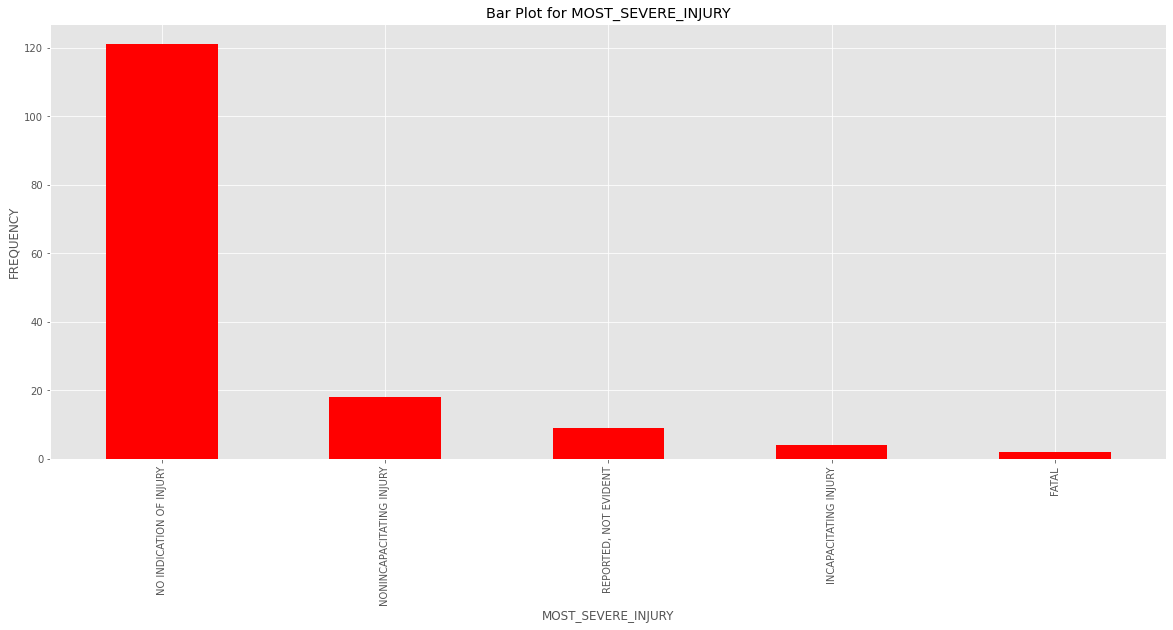

In [28]:
most_severe = chicago['MOST_SEVERE_INJURY']

most_severe_stats = most_severe.describe()
print(most_severe_stats)

chicago['MOST_SEVERE_INJURY'].value_counts().plot(kind='bar', figsize=(20, 8), color='red')
plt.title('Bar Plot for MOST_SEVERE_INJURY')
plt.xlabel('MOST_SEVERE_INJURY')
plt.ylabel('FREQUENCY')
plt.show()

under injuries the most is no indication of injury and the least are fatal injuries, most crashes have 0 injuries

count    154.000000
mean       0.357143
std        0.954375
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: INJURIES_TOTAL, dtype: float64


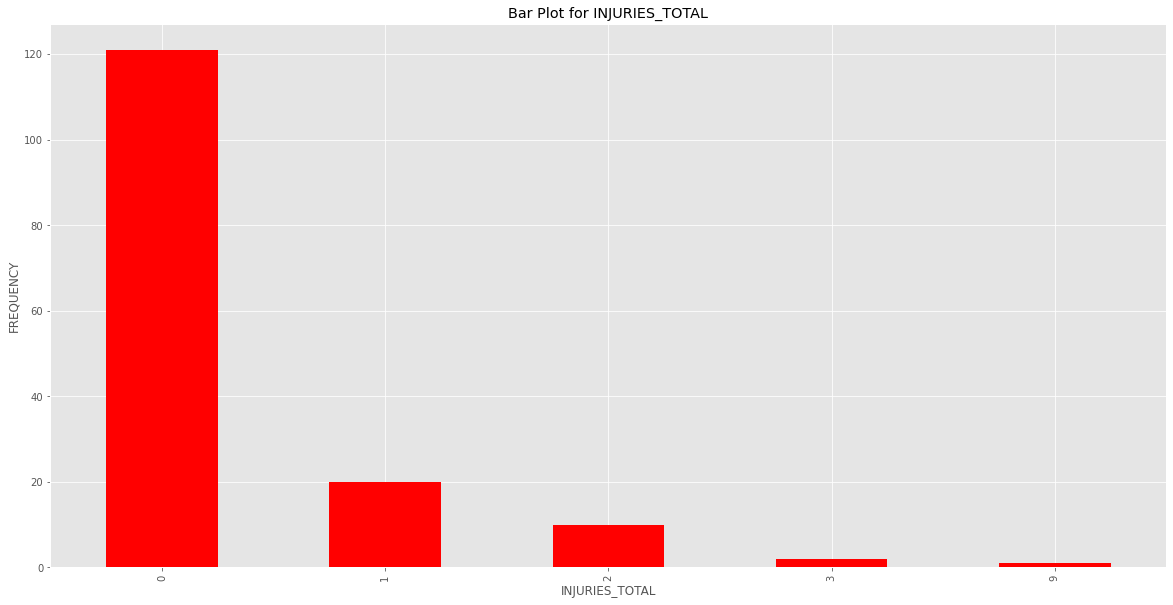

In [29]:
injury = chicago['INJURIES_TOTAL']

injury_stats = injury.describe()
print(injury_stats)

chicago['INJURIES_TOTAL'].value_counts().plot(kind='bar', figsize=(20, 10), color='red')
plt.title('Bar Plot for INJURIES_TOTAL')
plt.xlabel('INJURIES_TOTAL')
plt.ylabel('FREQUENCY')
plt.show()

### BIVARIATE ANALYSIS

Boxplots and count plots for categorical features vs. target variable:

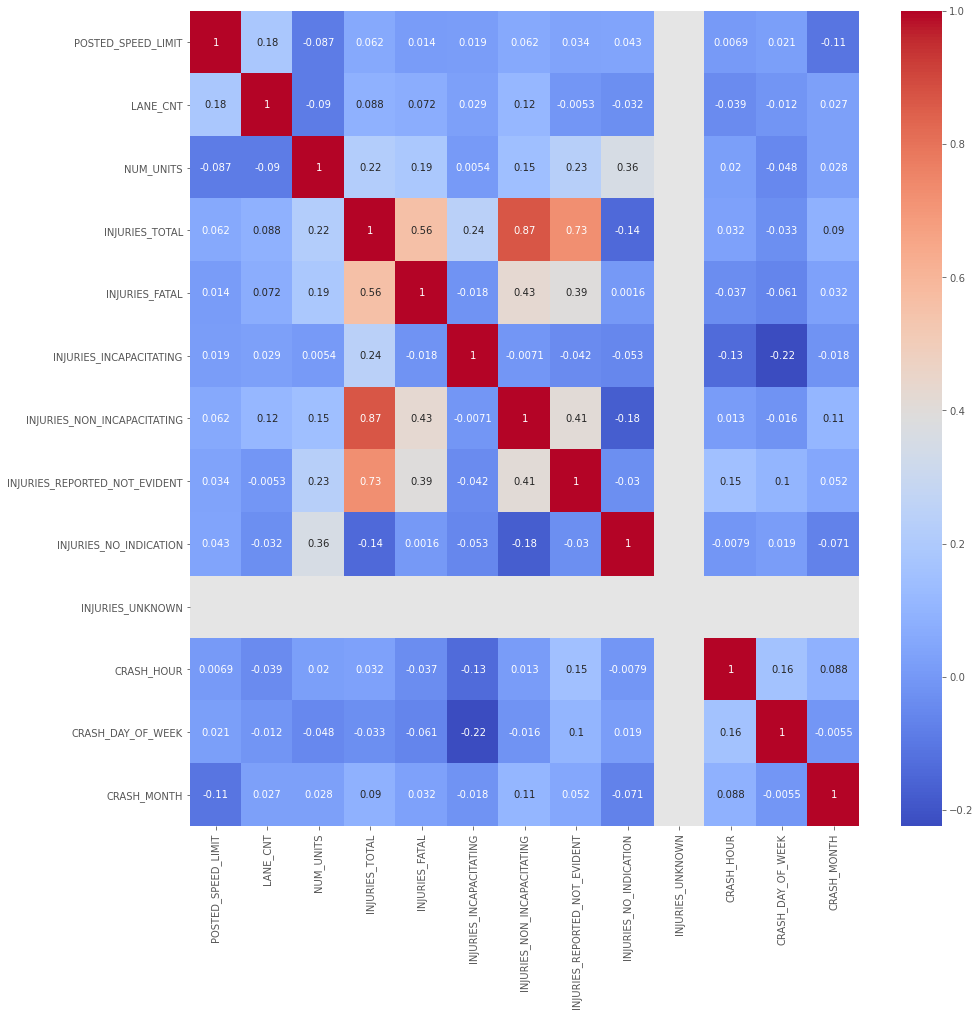

In [30]:
# Correlation heatmap for numerical data
corr = chicago.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


injuries total and injuries non incapacitating have a strong correlation of 0.87

injuries reported not evident and injuries total have a positive correlation of 0.73

Boxplots and count plots for categorical features vs. target variable:

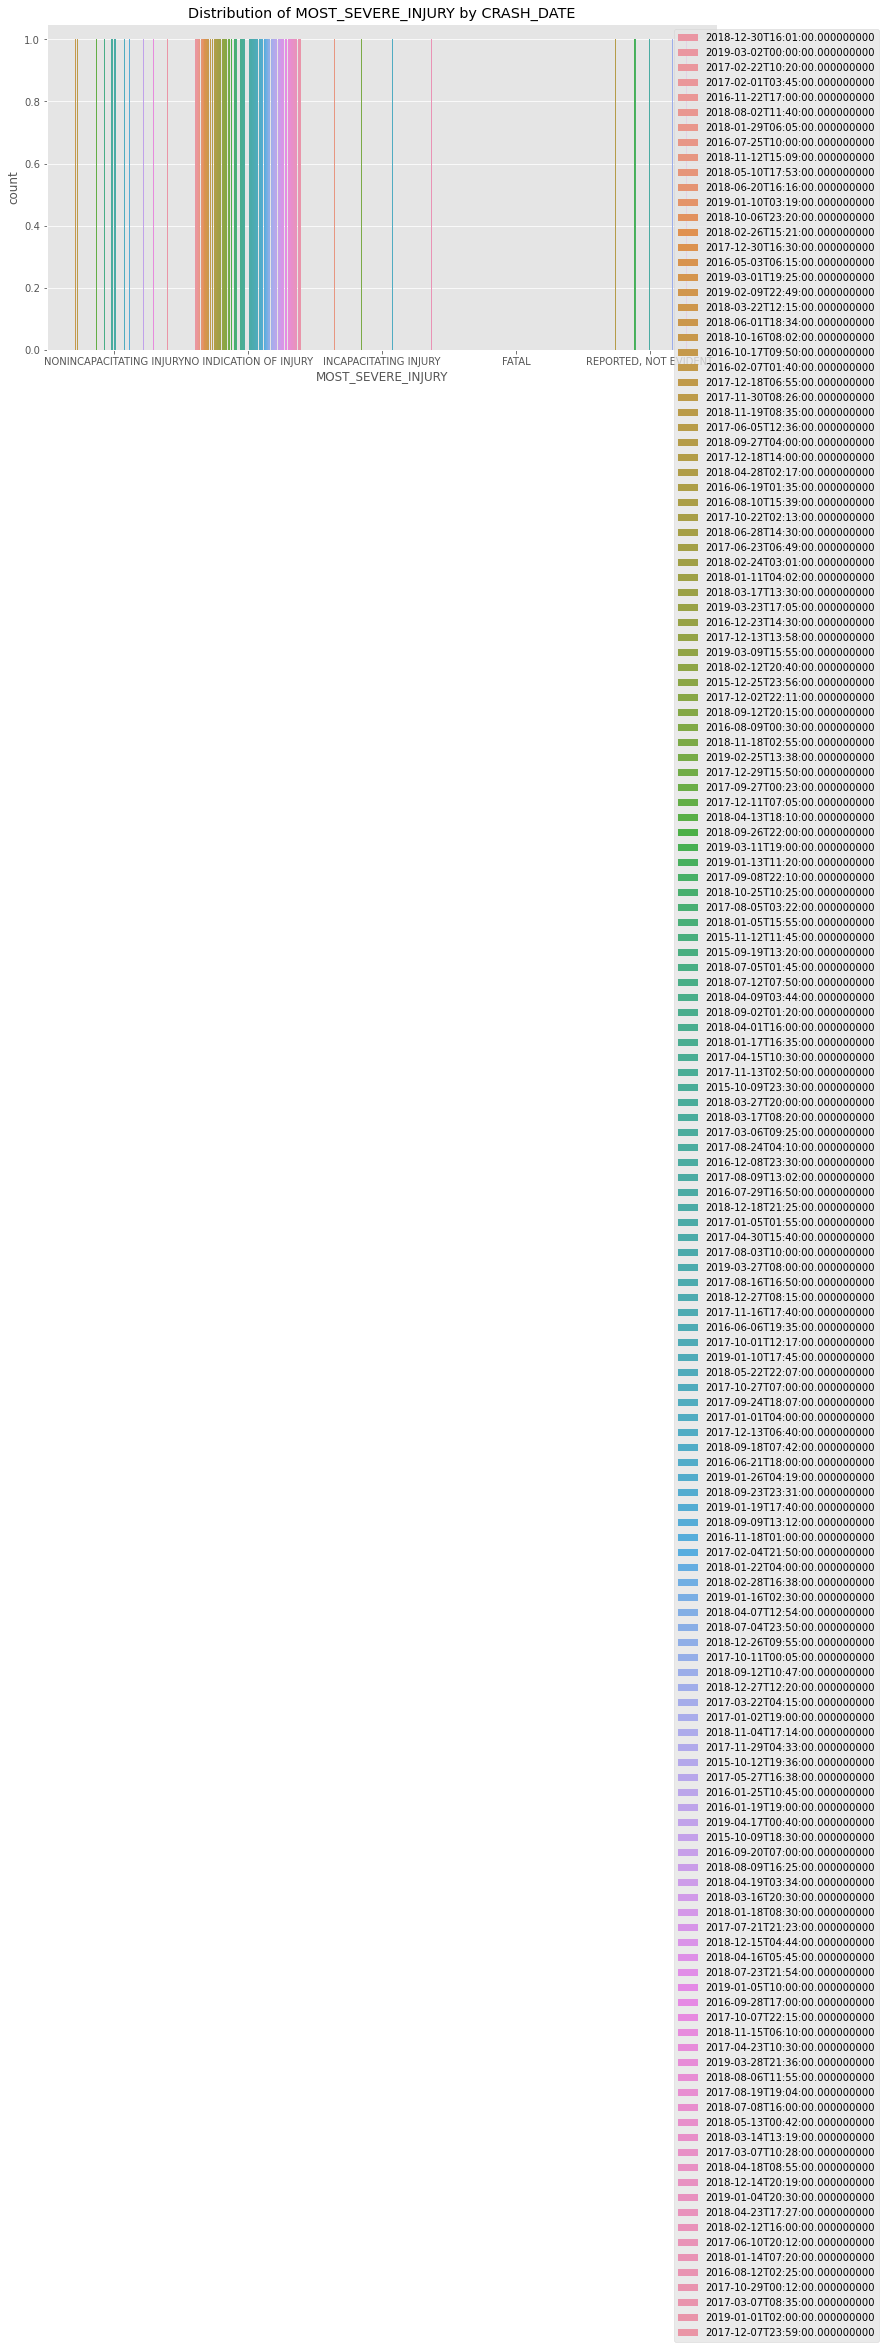

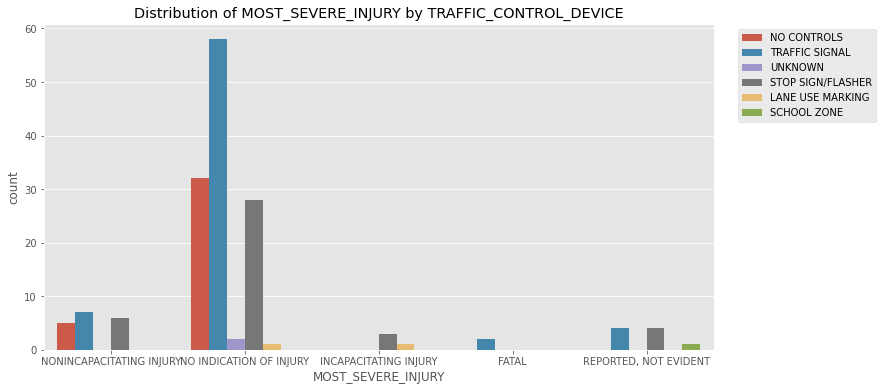

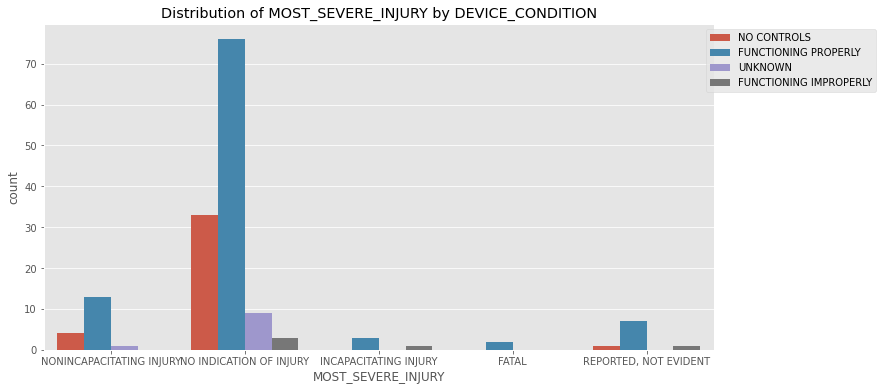

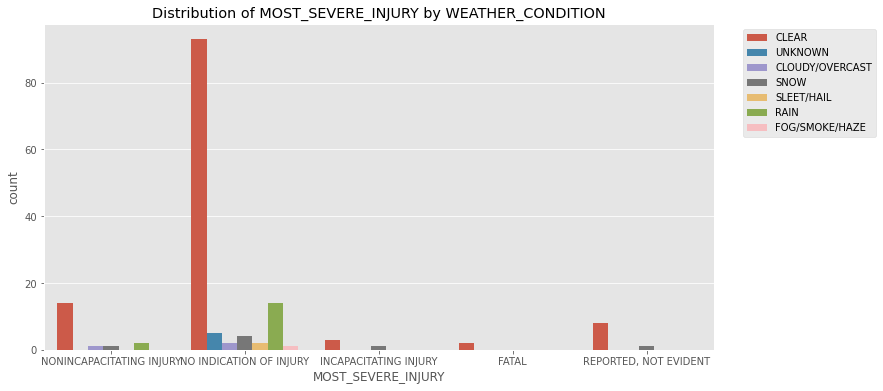

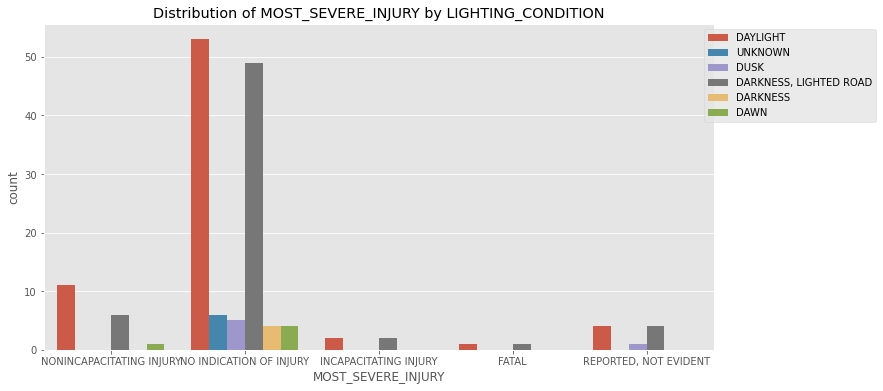

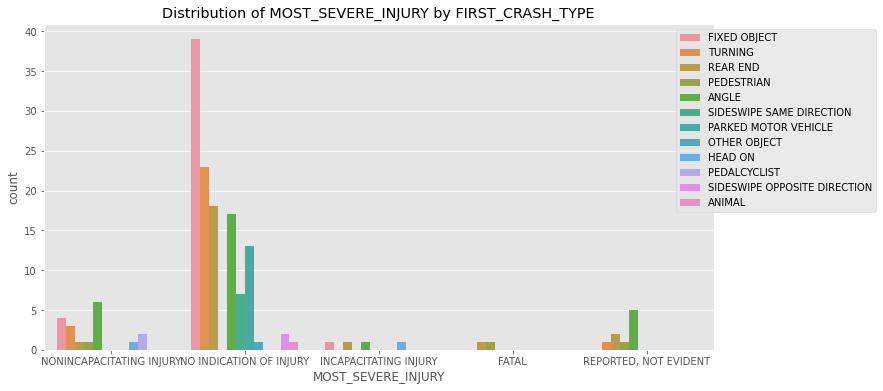

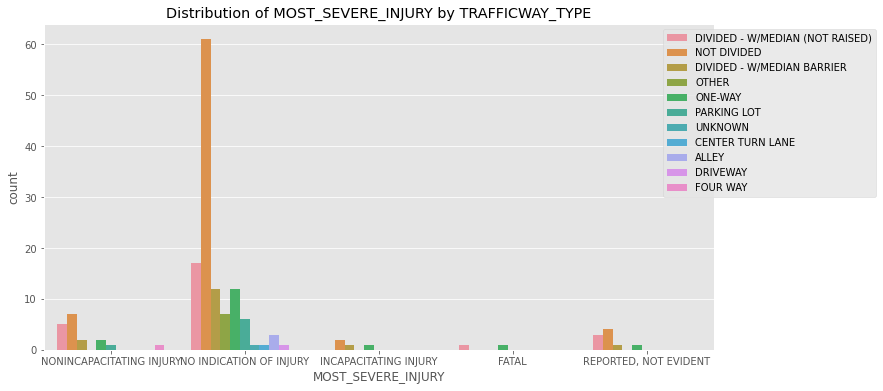

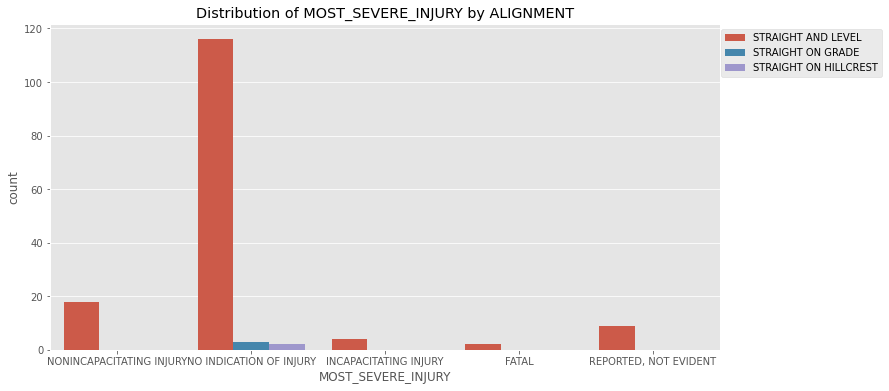

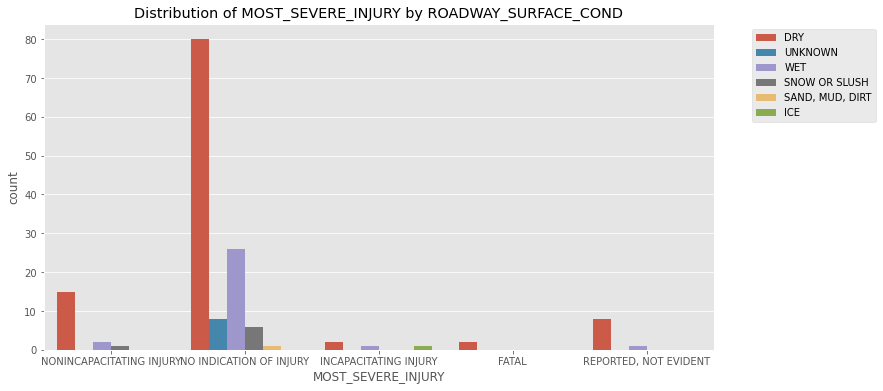

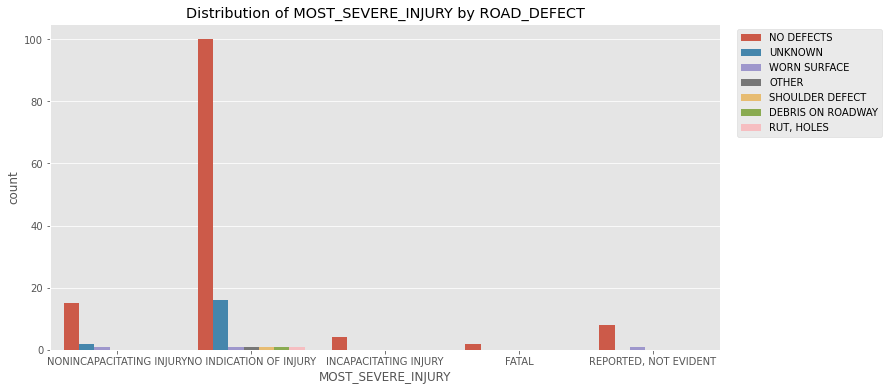

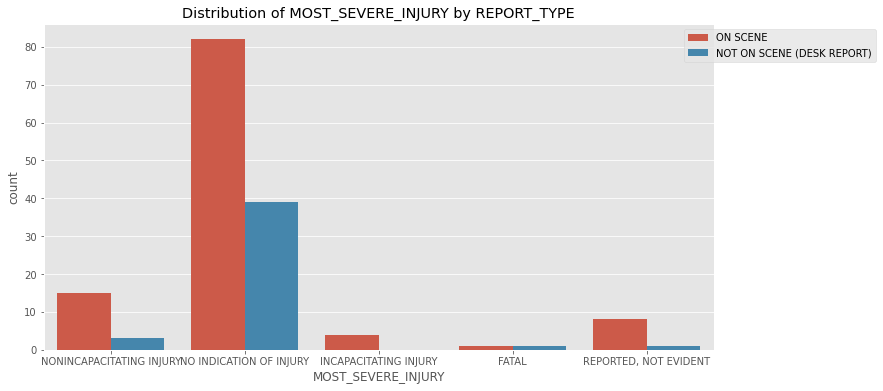

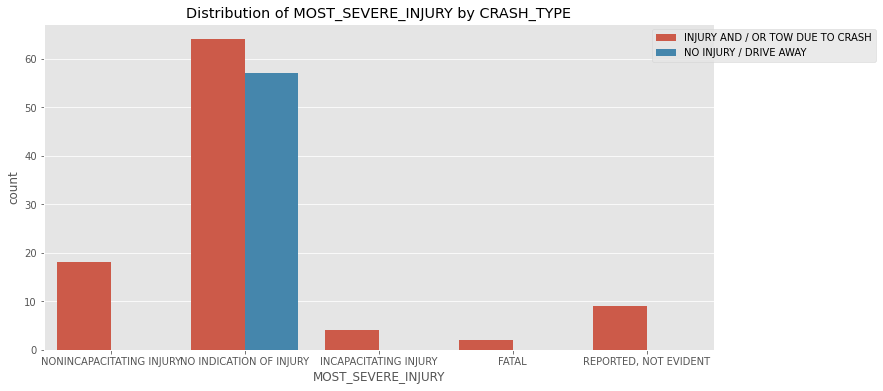

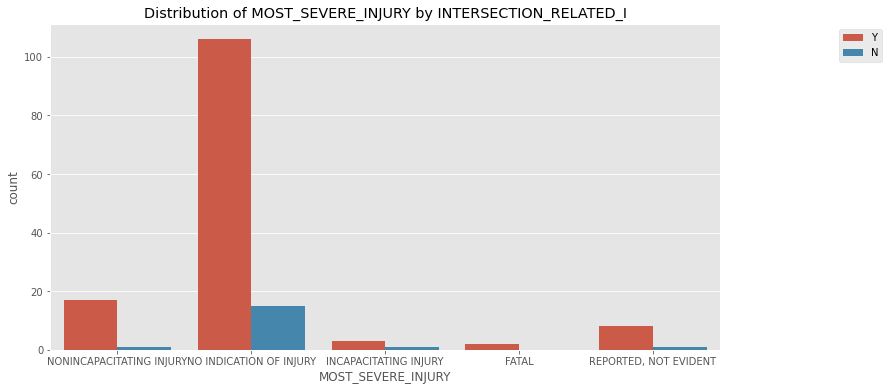

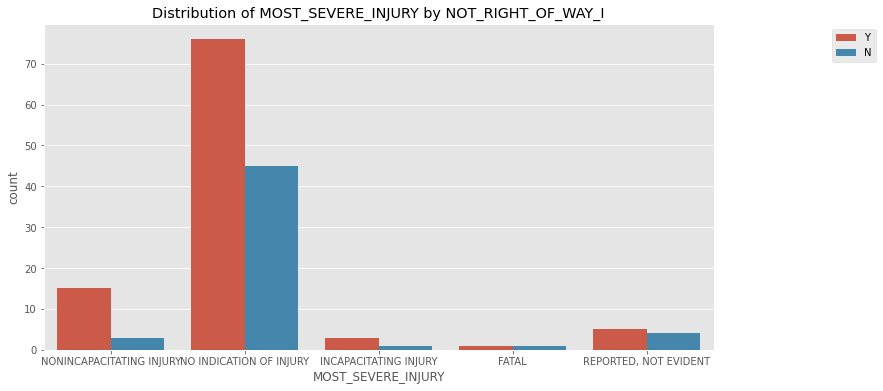

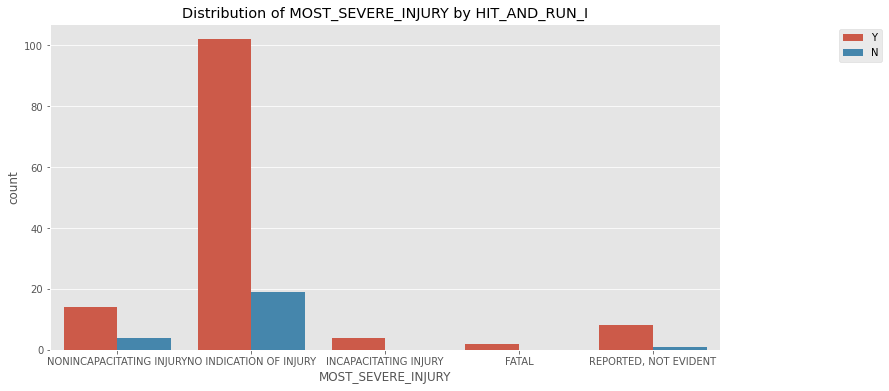

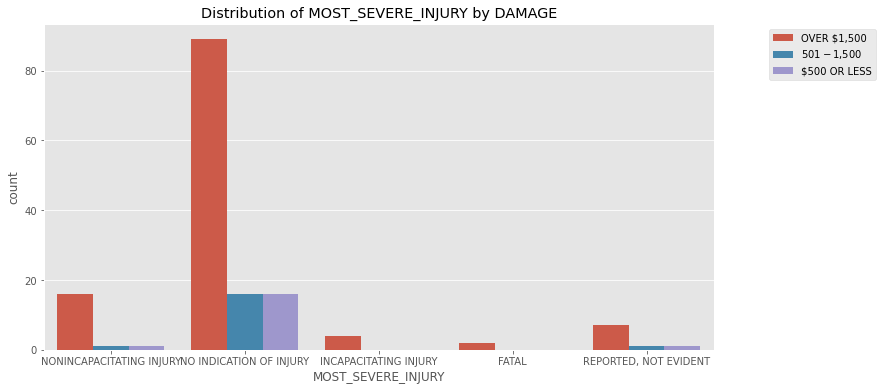

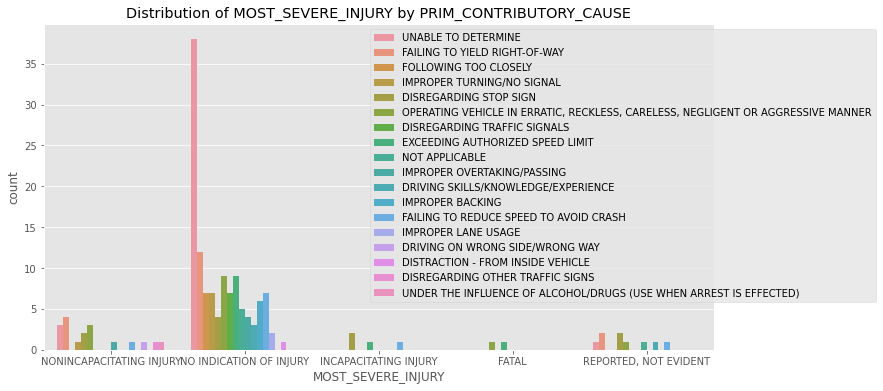

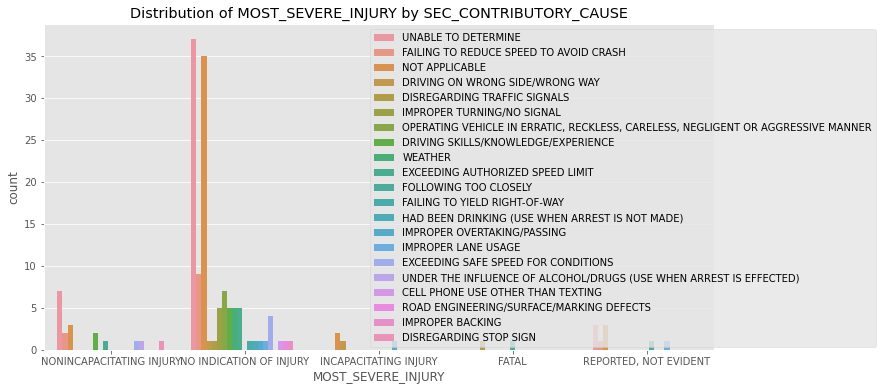

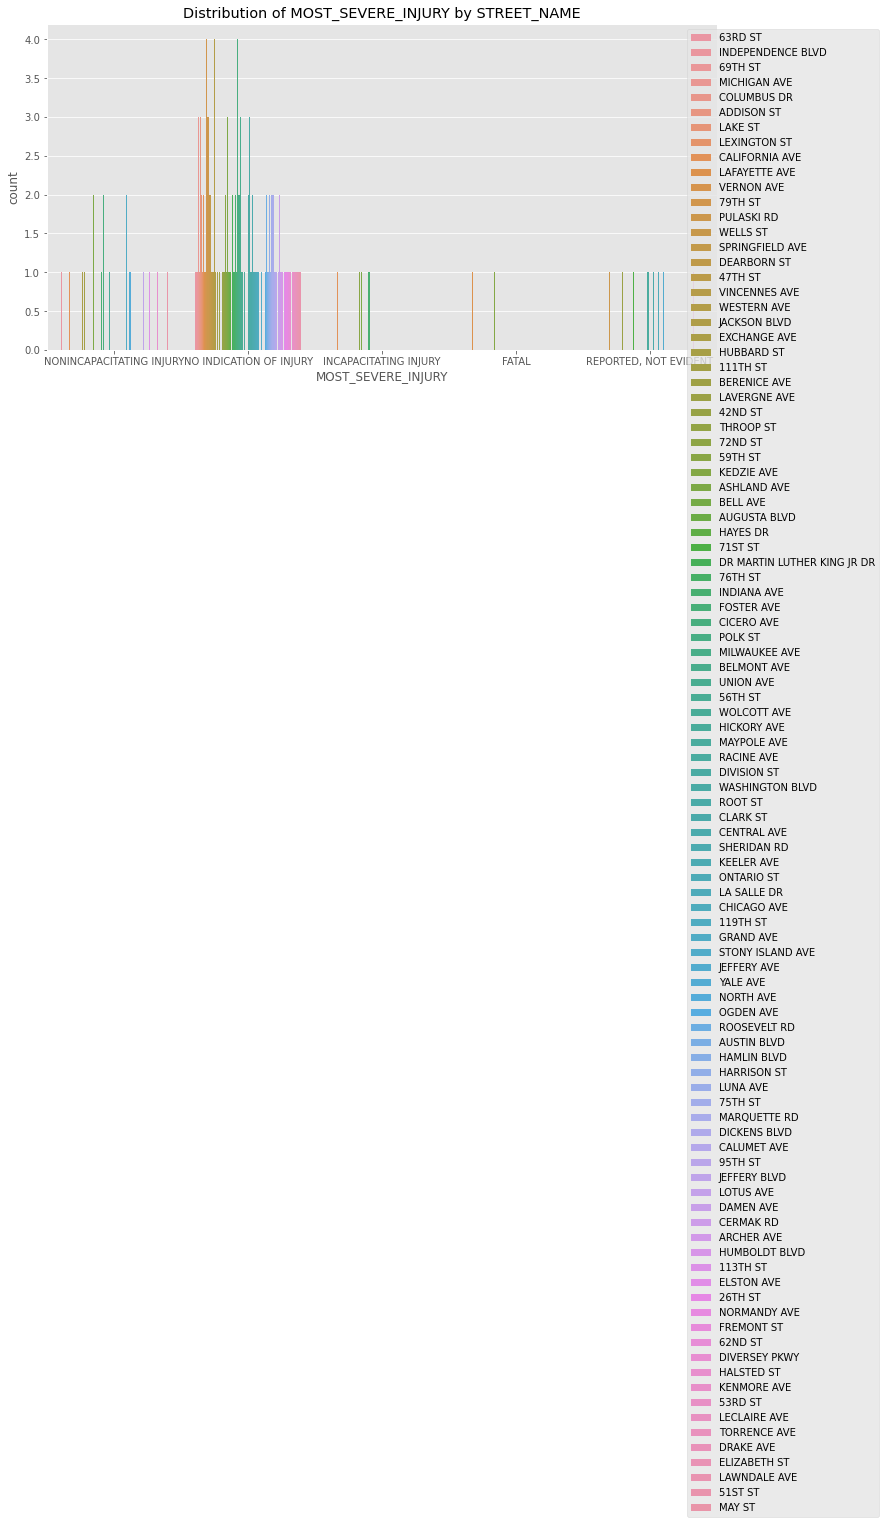

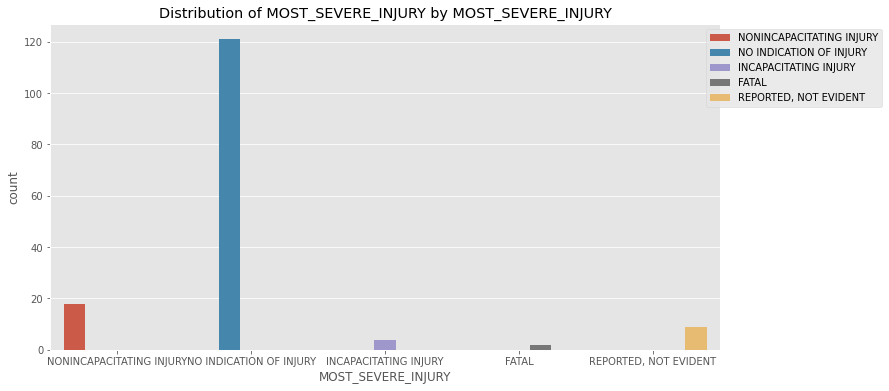

In [31]:
for col in cat_attributes:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='MOST_SEVERE_INJURY', hue=col, data=chicago)
    plt.title(f'Distribution of MOST_SEVERE_INJURY by {col}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()
    plt.close()

In [32]:
#scatterplot
chicago.select_dtypes(include='number').columns

Index(['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

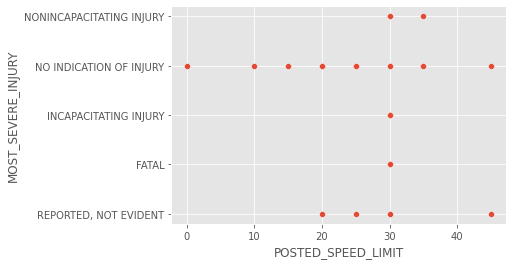

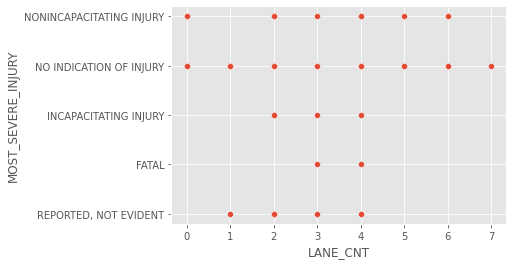

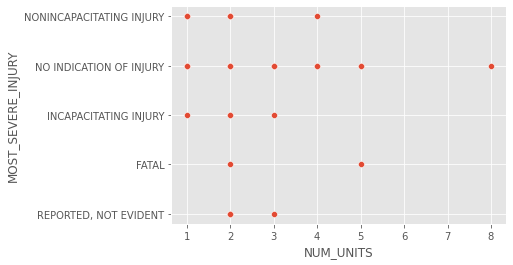

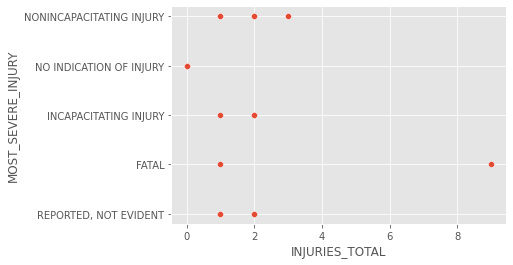

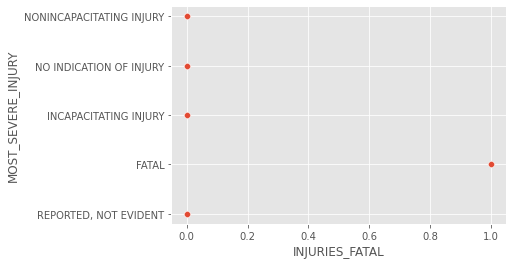

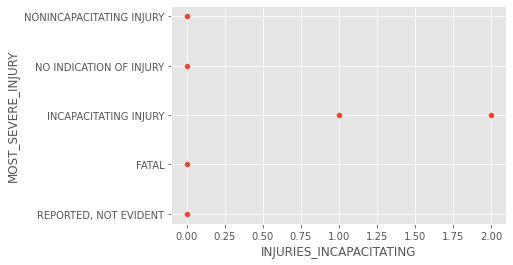

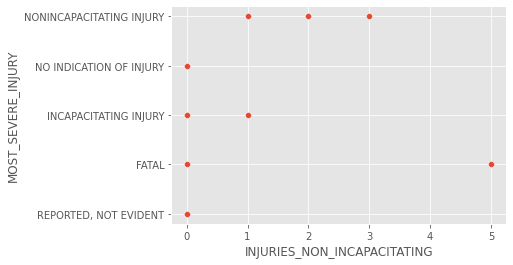

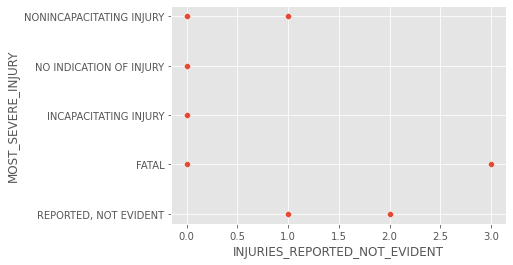

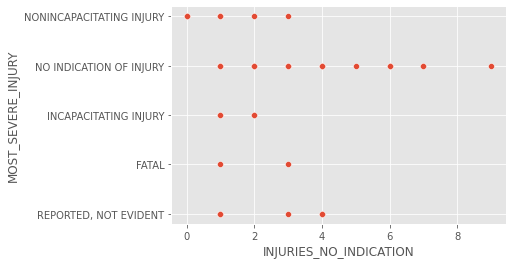

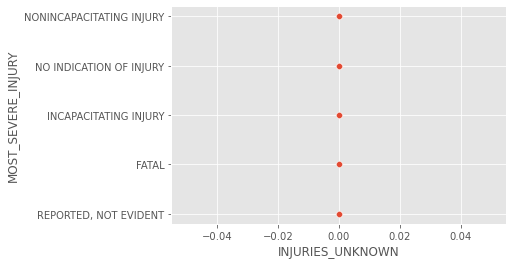

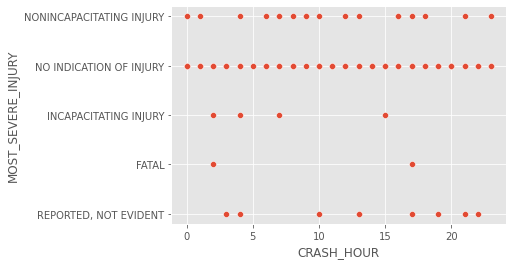

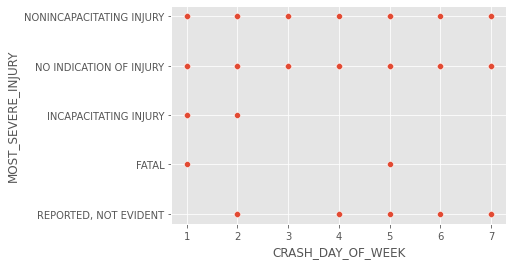

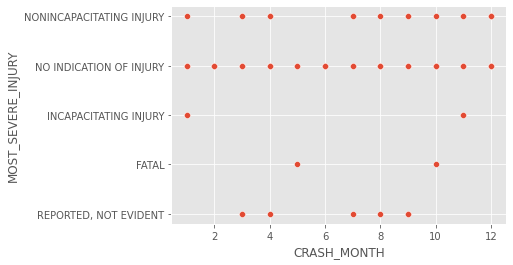

In [33]:
for i in ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']:
    sns.scatterplot(data = chicago,x=i,y='MOST_SEVERE_INJURY')
    plt.show()

plot of most severe injury categories against numerical columns

### MULTIVARIATE ANALYSIS

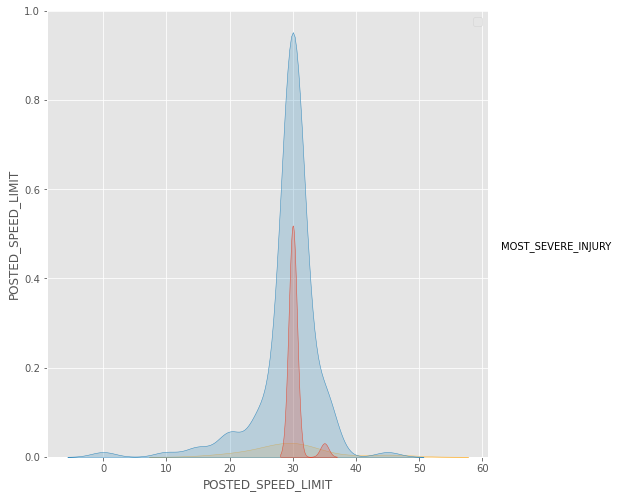

In [34]:
#pair plot
selected_features = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'MOST_SEVERE_INJURY']
pair_plot = sns.pairplot(chicago[selected_features], hue='MOST_SEVERE_INJURY', diag_kind='kde', height=7)
for ax in pair_plot.axes.flatten():
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', fontsize='large')

plt.show()


most crashes happen at around 30mph and fatal ones upto 58mph

FEATURE ENGINEERING WAS NOT DEEMED NECESSARY AS THE COLUMNS HELD GRANULAR INFO

### SUMMARY OF FINDINGS

####    TIME Patterns: Most accidents occur during the day, especially between 6 AM and 6 PM. Additionally, crashes predominantly happen from Monday to Saturday, with March to October witnessing the highest frequency of accidents.

####    Weather and Road Conditions: Clear weather conditions contribute to the majority of accidents, followed closely by rainy weather. The roads are typically in good condition and dry at the time of the crash.

####    Location and Traffic Control: The majority of accidents occur in mainstream areas like Cicero Drive, where traffic signals are present. However, crashes also happen in locations with no traffic controls, indicating potential non-compliance with traffic regulations.

####    Primary Contributory Causes: Primary contributory causes for accidents are often undetermined, followed by failure to yield the right of way and careless driving.

####    Severity of Injuries: The most common type of injury reported is no indication of injury, indicating that many accidents result in minor damage. Fatal injuries are less common, with most crashes resulting in non-incapacitating injuries.

####    Time of Day and Crash Types: Accidents occurring during the day are more likely to involve rear-end collisions and pedestrians, while nighttime accidents have a similar distribution of fatalities. Hit-and-run scenarios are more prevalent in fatal crashes.

####    Seasonal Trends: There appears to be a spike in accidents around July, coinciding with the 4th of July celebrations. Despite the increase in accidents, most injuries during this time are non-fatal.

### Overall, the data suggests that most accidents in Chicago occur during daylight hours, under clear weather conditions, at locations with traffic signals. While many accidents result in minimal damage, there is a notable spike in crashes around July, potentially due to holiday celebrations. Understanding these patterns can aid in the development of targeted interventions to reduce the frequency and severity of accidents in the city.

# MODELLING

### PREPROCESSING

##### LABEL ENCODING  /  ONE HOT ENCODING

In [53]:
chicago.select_dtypes(include='object').columns
#get categorical columns to make into number

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME', 'MOST_SEVERE_INJURY'],
      dtype='object')

In [54]:
#one hot encoding
dummy = pd.get_dummies(data = chicago,columns=['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME', 'MOST_SEVERE_INJURY'],drop_first=True)

In [55]:
pd.set_option('display.max_columns',None)
dummy

CRASH_DATE  POSTED_SPEED_LIMIT  LANE_CNT  NUM_UNITS  \
19664  2018-12-30 16:01:00                  30         4          1   
30556  2019-03-02 00:00:00                  30         0          1   
34025  2017-02-22 10:20:00                  30         2          2   
37440  2017-02-01 03:45:00                  30         4          1   
37462  2016-11-22 17:00:00                   0         2          3   
...                    ...                 ...       ...        ...   
790661 2016-08-12 02:25:00                  30         4          2   
792857 2017-10-29 00:12:00                  30         2          8   
793354 2017-03-07 08:35:00                  30         4          2   
805800 2019-01-01 02:00:00                  35         2          2   
806299 2017-12-07 23:59:00                  30         2          2   

        INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
19664                1               0                        0   
30556                0               0                        0   
34025                0               0                        0   
37440                0               0                        0   
37462                0               0                        0   
...                ...             ...                      ...   
790661               0               0                        0   
792857               0               0                        0   
793354               0               0                        0   
805800               0               0                        0   
806299               3               0                        0   

        INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
19664                             1                              0   
30556                             0                              0   
34025                             0                              0   
37440                             0                              0   
37462                             0                              0   
...                             ...                            ...   
790661                            0                              0   
792857                            0                              0   
793354                            0                              0   
805800                            0                              0   
806299                            2                              1   

        INJURIES_NO_INDICATION  INJURIES_UNKNOWN  CRASH_HOUR  \
19664                        0                 0          16   
30556                        1                 0           0   
34025                        2                 0          10   
37440                        1                 0           3   
37462                        2                 0          17   
...                        ...               ...         ...   
790661                       3                 0           2   
792857                       3                 0           0   
793354                       3                 0           8   
805800                       6                 0           2   
806299                       1                 0          23   

        CRASH_DAY_OF_WEEK  CRASH_MONTH  TRAFFIC_CONTROL_DEVICE_NO CONTROLS  \
19664                   1           12                                   1   
30556                   7            3                                   0   
34025                   4            2                                   1   
37440                   4            2                                   0   
37462                   3           11                                   0   
...                   ...          ...                                 ...   
790661                  6            8                                   0   
792857                  1           10                                   0   
793354                  3            3        

In [56]:
#all columns are well labelled so no need to make changes

In [57]:
chicago.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'STREET_NAME', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['POSTED_SPEED_LIMIT', 'LANE_CNT', 'NUM_UNITS', 'INJURIES_TOTAL',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH','CRASH_DATE']

x_vars = chicago.drop(columns_to_drop + ['MOST_SEVERE_INJURY'], axis = 1)
y_vars = chicago['MOST_SEVERE_INJURY']

#oe hot encoding
x_vars = pd.get_dummies(x_vars, drop_first=True)


xTrain, xValid, yTrain, yValid = train_test_split(x_vars, y_vars, train_size=0.6, random_state=2)

#### 1. LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [60]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(xTrain, yTrain)

LogisticRegression(max_iter=1000)

In [61]:
#test for accuracy
from sklearn.metrics import accuracy_score
predictions = log_model.predict(xTrain)
accuracy_score(yTrain, predictions)

1.0

In [62]:
predictions2 = log_model.predict(xValid)
accuracy_score(yValid, predictions2)

0.7258064516129032

#### 2. CONFUSION MATRIX

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(C=0.1, max_iter=1000)  # Lower C means stronger regularization

# Fit the model
log_model.fit(xTrain, yTrain)

# Predict on the training set
train_predictions = log_model.predict(xTrain)
train_accuracy = accuracy_score(yTrain, train_predictions)
print("Training Accuracy with Regularization:", train_accuracy)

# Predict on the validation set
y_pred_valid = log_model.predict(xValid)

# Evaluate the model on validation set
valid_accuracy = accuracy_score(yValid, y_pred_valid)
print("Validation Accuracy with Regularization:", valid_accuracy)
print("Classification Report:\n", classification_report(yValid, y_pred_valid))
print("Confusion Matrix:\n", confusion_matrix(yValid, y_pred_valid))

Training Accuracy with Regularization: 0.8152173913043478
Validation Accuracy with Regularization: 0.7419354838709677
Classification Report:
                           precision    recall  f1-score   support

   INCAPACITATING INJURY       0.00      0.00      0.00         1
 NO INDICATION OF INJURY       0.74      1.00      0.85        46
NONINCAPACITATING INJURY       0.00      0.00      0.00        10
   REPORTED, NOT EVIDENT       0.00      0.00      0.00         5

                accuracy                           0.74        62
               macro avg       0.19      0.25      0.21        62
            weighted avg       0.55      0.74      0.63        62

Confusion Matrix:
 [[ 0  1  0  0]
 [ 0 46  0  0]
 [ 0 10  0  0]
 [ 0  5  0  0]]


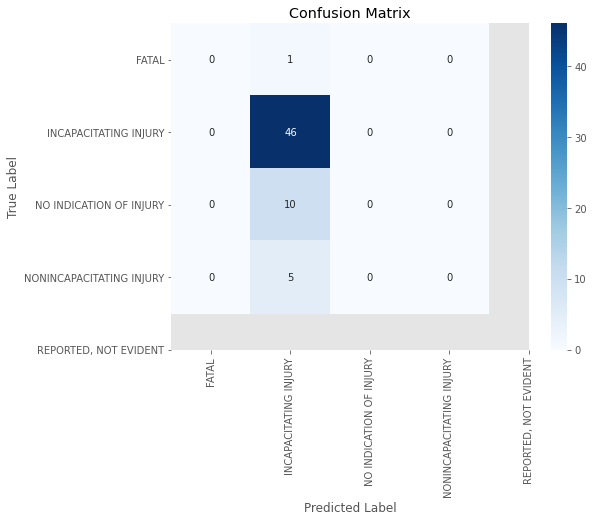

In [64]:
#VIZ OF CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted classes on the validation set
predicted_classes = log_model.predict(xValid)

# Calculate confusion matrix
conf_matrix = confusion_matrix(yValid, predicted_classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### 3. LOGISTIC REGRESSION 2

In [67]:
y = chicago['FIRST_CRASH_TYPE']

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on 'WEATHER_CONDITION'
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(chicago[['WEATHER_CONDITION']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.2903225806451613
Classification Report:
                              precision    recall  f1-score   support

                       ANGLE       0.00      0.00      0.00         2
                FIXED OBJECT       0.28      1.00      0.43         8
        PARKED MOTOR VEHICLE       0.00      0.00      0.00         4
                  PEDESTRIAN       0.00      0.00      0.00         1
                    REAR END       0.00      0.00      0.00         4
SIDESWIPE OPPOSITE DIRECTION       0.00      0.00      0.00         1
    SIDESWIPE SAME DIRECTION       0.00      0.00      0.00         3
                     TURNING       1.00      0.12      0.22         8

                    accuracy                           0.29        31
                   macro avg       0.16      0.14      0.08        31
                weighted avg       0.33      0.29      0.17        31

Confusion Matrix:
[[0 2 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 4 0 0 0

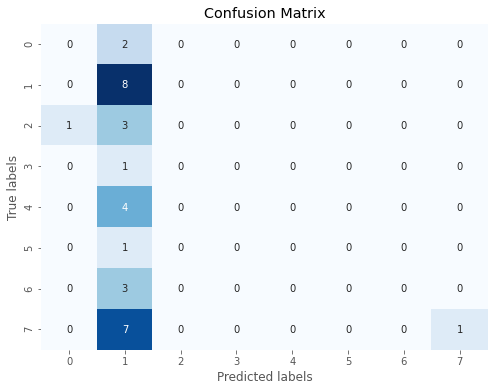

In [69]:
#VIZ OF INJURY TO WEATHER
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### 4. DECISION TREEES

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Perform one-hot encoding on 'WEATHER_CONDITION' and 'FIRST_CRASH_TYPE'
X_encoded = pd.get_dummies(chicago[['WEATHER_CONDITION', 'FIRST_CRASH_TYPE']])

#data split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, chicago['FIRST_CRASH_TYPE'], test_size=0.2, random_state=42)

#Initialize and fit decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

#predict on test set
y_pred = tree_model.predict(X_test)

#valuate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#other eval metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.967741935483871
Classification Report:
                              precision    recall  f1-score   support

                       ANGLE       1.00      1.00      1.00         2
                      ANIMAL       0.00      0.00      0.00         0
                FIXED OBJECT       1.00      1.00      1.00         8
        PARKED MOTOR VEHICLE       1.00      1.00      1.00         4
                  PEDESTRIAN       1.00      1.00      1.00         1
                    REAR END       1.00      1.00      1.00         4
SIDESWIPE OPPOSITE DIRECTION       0.00      0.00      0.00         1
    SIDESWIPE SAME DIRECTION       1.00      1.00      1.00         3
                     TURNING       1.00      1.00      1.00         8

                    accuracy                           0.97        31
                   macro avg       0.78      0.78      0.78        31
                weighted avg       0.97      0.97      0.97        31

Confusion Matrix:
[[2 0 0 0 0 0 0 0 

The model performs exceptionally well for most crash types, with perfect precision and recall in several cases. This suggests that the model is reliable in predicting these crash types when they occur.

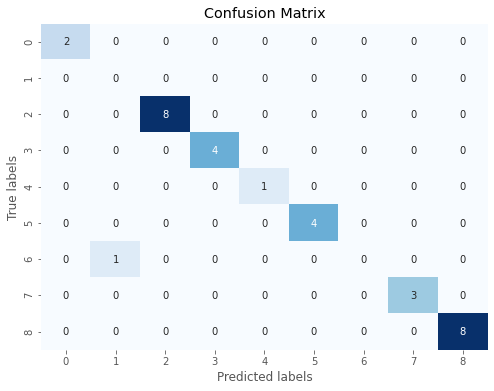

In [71]:
#VIZ OF INJURY TO WEATHER
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# RECOMENDATIONS

#### ANALISYS ON MODELS

THE FIRST REGRESSION MODEL OVERFITTED WHEN IT CAME TO ACCURACY WITH 100% ACCURACY AND HAD A VALIDATION SCORE OF 72%

THE SECOND CONFUSION MATRIX GAVE A BETTER PREDICTION WHEN IT COMES TO MORE NON FATAL CRASHES HAPENNING AT 85% BUT NOT ON HOW TO GREATLY REDUCE FATAL ONES AT 74% OVERALL

THE THIRD REGRESSION MODEL TARGETING THE RLSHP BETWEEN CRASH TYPE AND WEATHER CONDITIONS THE ACCURACY WAS REALLY LOW AT 29% THEREFOR NOT MUCH COULD BE PREDICTED FROM IT

THE FOURTH MODEL A DECION TREE TARGETING THE RLSHP BETWEEN CRASH TYPE AND WEATHER CONDITIONS, THIS ONE WAS BALE TO GIVE US BETTER RESULTS SHOWING THAT THE PREDCTION FOR THE CRASH TYPE IS VERY ACCURATE AND HIGH AT 96%

THE MODEL THAT PRODUCED CONSISTENT RESULTS WAS THE CONFUSION MATRIX AND THE DECISION TREE, I PRESUME LOGISTIC REGRESSIOON WASN'T BEST FIT BECAUSE IT IS BEST SUITED FOR BINARY CATEWGORIES

BETWEEN THE CONFUSION MATRIX GAVE A MORE ACCURATE DEPICTION OF THE RELATIONSHIP BETWEEN THE TARGET AND FEATURE VARIABLES

## TO CHICAGO POLICE DEPARTMENT

###  LIMITATIONS

ABSENCE OF CROSS VALIDATION AND REGULARIZING CLASS IMBALANCE
ABSENCE OF FEATURE ENGINEERING THOUGH THE DATA HELD GRANULAR DATA
NOT BINNING MY VARIABLES FOR FURTHER ANALYSIS

### CONCLUSION